# Problem Formulation:
















This case study aims to give an idea of applying EDA in a real business scenario. In this case study, we will develop a basic understanding of risk analytics in banking and financial services and understand how data is used to minimise the risk of losing money while lending to customers.

**Business Understanding:**

The loan providing companies find it hard to give loans to the people due to their insufficient or non-existent credit history. Because of that, some consumers use it as their advantage by becoming a defaulter. Suppose you work for a consumer finance company which specialises in lending various types of loans to urban customers. You have to use EDA to analyse the patterns present in the data. This will ensure that the applicants capable of repaying the loan are not rejected.
When the company receives a loan application, the company has to decide for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company
If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.
The data given below contains the information about the loan application at the time of applying for the loan. It contains two types of scenarios:

The client with payment difficulties: he/she had late payment more than X days on at least one of the first Y instalments of the loan in our sample
All other cases: All other cases when the payment is paid on time
When a client applies for a loan, there are four types of decisions that could be taken by the client/company:

Approved: The Company has approved loan Application
Cancelled: The client cancelled the application sometime during approval. Either the client changed her/his mind about the loan or in some cases due to a higher risk of the client he received worse pricing which he did not want.
Refused: The company had rejected the loan (because the client does not meet their requirements etc.)
Unused offer: Loan has been cancelled by the client but on different stages of the process.

**Business Objective:**

This case study aims to identify patterns which indicate if a client has difficulty paying their installments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.
In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default. The company can utilise this knowledge for its portfolio and risk assessment.




# Important Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO # Capture DataFrame info as a formatted string
import warnings
warnings.filterwarnings('ignore')



In [ ]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.expand_frame_repr', False)


# Reading The Dataset

In [ ]:
desc_col = pd.read_csv(f"/content/drive/MyDrive/Work/Banque Misr/Loan Defaulter Archive/columns_description.csv")
app_df = pd.read_csv(f"/content/drive/MyDrive/Work/Banque Misr/Loan Defaulter Archive/application_data.csv")
prev_app_df = pd.read_csv(f"/content/drive/MyDrive/Work/Banque Misr/Loan Defaulter Archive/previous_application.csv")

In [ ]:
# Data Dimesions
print ("application_data     :",app_df.shape)
print ("previous_application :",prev_app_df.shape)
print ("columns_description  :",desc_col.shape)

application_data     : (307511, 122)
previous_application : (1670214, 37)
columns_description  : (160, 5)


In [ ]:
display("columns_description")
pd.set_option('display.max_colwidth', 1)
display(desc_col)

'columns_description'

,Unnamed: 0,Table,Row,Description,Special
0,1,application_data,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_data,TARGET,"Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)",NaN
2,5,application_data,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_data,CODE_GENDER,Gender of the client,NaN
4,7,application_data,FLAG_OWN_CAR,Flag if the client owns a car,NaN
5,8,application_data,FLAG_OWN_REALTY,Flag if client owns a house or flat,NaN
6,9,application_data,CNT_CHILDREN,Number of children the client has,NaN
7,10,application_data,AMT_INCOME_TOTAL,Income of the client,NaN
8,11,application_data,AMT_CREDIT,Credit amount of the loan,NaN
9,12,application_data,AMT_ANNUITY,Loan annuity,NaN


In [ ]:
app_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [ ]:
prev_app_df.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
desc_col.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   160 non-null    int64 
 1   Table        160 non-null    object
 2   Row          160 non-null    object
 3   Description  160 non-null    object
 4   Special      69 non-null     object
dtypes: int64(1), object(4)
memory usage: 6.4+ KB


In [ ]:
app_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [ ]:
buffer = StringIO()
app_df.info(verbose=True, buf=buffer)
info_str = buffer.getvalue()
buffer.close()

non_null_counts = app_df.notnull().sum()


info_output = f"<class 'pandas.core.frame.DataFrame'>\n"
info_output += f"RangeIndex: {len(app_df)} entries, 0 to {len(app_df) - 1}\n"
info_output += f"Data columns (total {len(app_df.columns)} columns):\n"
info_output += " #   Column                       Non-Null Count    Dtype  \n"
info_output += "---  ------                       --------------    -----  \n"

for idx, (col, dtype) in enumerate(app_df.dtypes.items()):
    non_null_count = non_null_counts[col]
    info_output += f" {idx:<3}  {col:<30} {non_null_count:<15}  {dtype}\n"

info_output += f"dtypes: {app_df.dtypes.value_counts().to_dict()}\n"
info_output += f"memory usage: {app_df.memory_usage(deep=True).sum() / (1024**2):.1f} MB\n"


print(info_output)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0    SK_ID_CURR                     307511           int64
 1    TARGET                         307511           int64
 2    NAME_CONTRACT_TYPE             307511           object
 3    CODE_GENDER                    307511           object
 4    FLAG_OWN_CAR                   307511           object
 5    FLAG_OWN_REALTY                307511           object
 6    CNT_CHILDREN                   307511           int64
 7    AMT_INCOME_TOTAL               307511           float64
 8    AMT_CREDIT                     307511           float64
 9    AMT_ANNUITY                    307499           float64
 10   AMT_GOODS_PRICE                307233           float64
 11   NAME_TYPE_SUITE                306219           object
 12   NAME_INCOME_TYPE             

In [ ]:
prev_app_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [ ]:
app_df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [ ]:
prev_app_df.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,5951.000000,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,0.188357,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,0.087671,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,0.034781,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,0.160716,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,0.189122,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,0.193330,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,1.000000,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [ ]:
desc_col['Table'].unique()

array(['application_data', 'previous_application.csv'], dtype=object)

In [ ]:
desc_col['Row'].unique()

array(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3',

In [ ]:
display(desc_col[desc_col["Table"] == 'application_data'])

,Unnamed: 0,Table,Row,Description,Special
0,1,application_data,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_data,TARGET,"Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)",NaN
2,5,application_data,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_data,CODE_GENDER,Gender of the client,NaN
4,7,application_data,FLAG_OWN_CAR,Flag if the client owns a car,NaN
5,8,application_data,FLAG_OWN_REALTY,Flag if client owns a house or flat,NaN
6,9,application_data,CNT_CHILDREN,Number of children the client has,NaN
7,10,application_data,AMT_INCOME_TOTAL,Income of the client,NaN
8,11,application_data,AMT_CREDIT,Credit amount of the loan,NaN
9,12,application_data,AMT_ANNUITY,Loan annuity,NaN


In [ ]:
display(desc_col[desc_col["Table"] == 'previous_application.csv'])

,Unnamed: 0,Table,Row,Description,Special
122,176,previous_application.csv,SK_ID_PREV,"ID of previous credit in Home credit related to loan in our sample. (One loan in our sample can have 0,1,2 or more previous loan applications in Home Credit, previous application could, but not necessarily have to lead to credit)",hashed
123,177,previous_application.csv,SK_ID_CURR,ID of loan in our sample,hashed
124,178,previous_application.csv,NAME_CONTRACT_TYPE,"Contract product type (Cash loan, consumer loan [POS] ,...) of the previous application",NaN
125,179,previous_application.csv,AMT_ANNUITY,Annuity of previous application,NaN
126,180,previous_application.csv,AMT_APPLICATION,For how much credit did client ask on the previous application,NaN
127,181,previous_application.csv,AMT_CREDIT,"Final credit amount on the previous application. This differs from AMT_APPLICATION in a way that the AMT_APPLICATION is the amount for which the client initially applied for, but during our approval process he could have received different amount - AMT_CREDIT",NaN
128,182,previous_application.csv,AMT_DOWN_PAYMENT,Down payment on the previous application,NaN
129,183,previous_application.csv,AMT_GOODS_PRICE,Goods price of good that client asked for (if applicable) on the previous application,NaN
130,184,previous_application.csv,WEEKDAY_APPR_PROCESS_START,On which day of the week did the client apply for previous application,NaN
131,185,previous_application.csv,HOUR_APPR_PROCESS_START,Approximately at what day hour did the client apply for the previous application,rounded


# Redundant Columns & Some Feature Selection

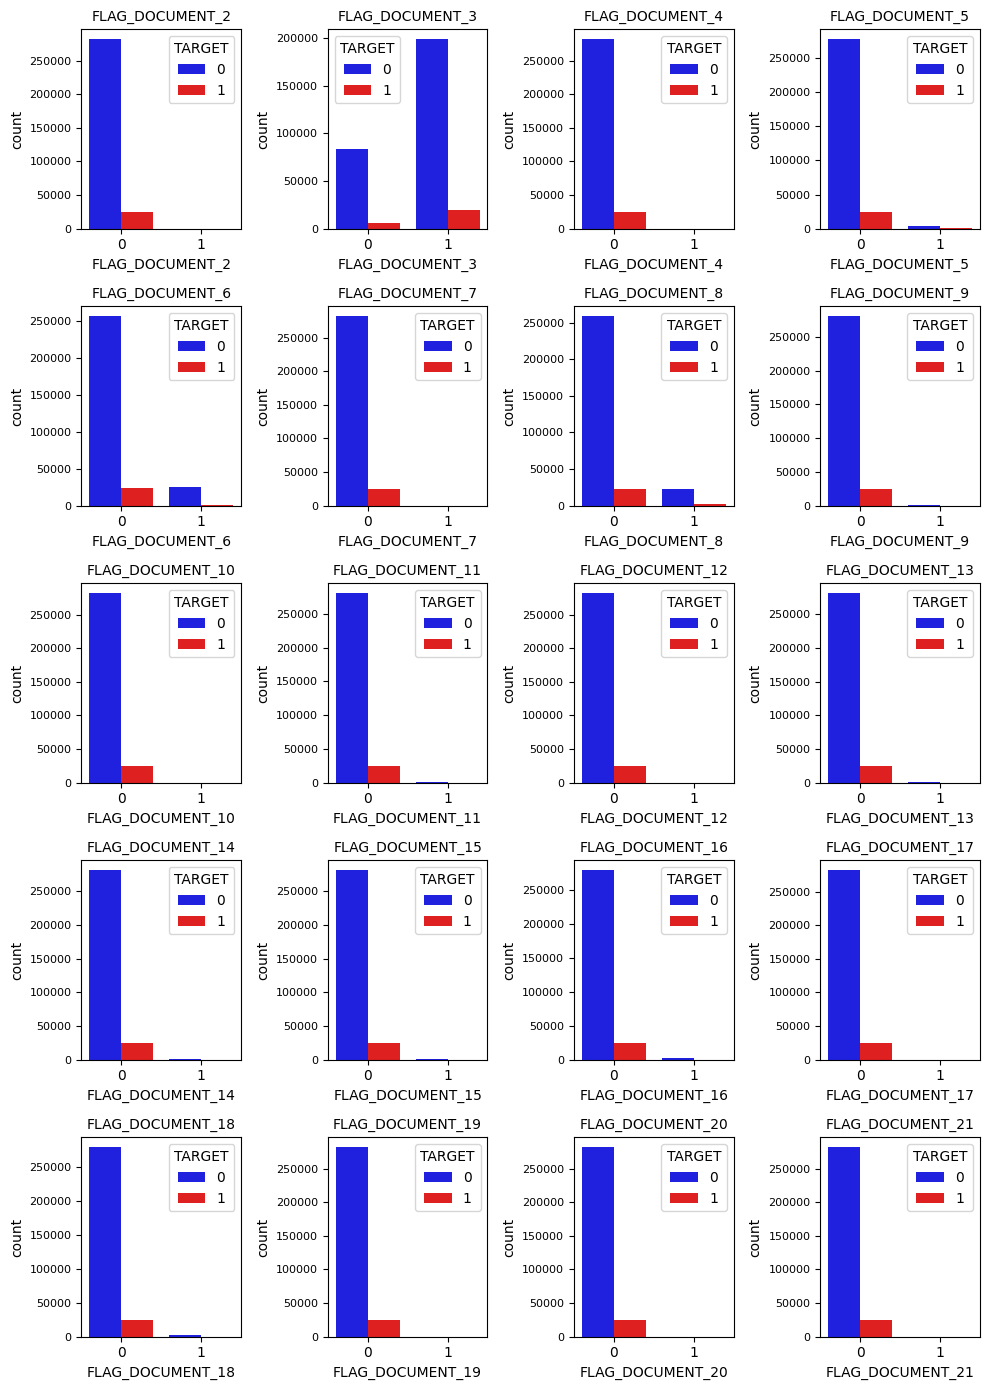

In [ ]:
# Application file
doc = [
    'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5',
    'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
    'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13',
    'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17',
    'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

flags = app_df[doc + ["TARGET"]]

plt.figure(figsize=(10, 14))

for idx, column in enumerate(doc):
    plt.subplot(5, 4, idx + 1)
    sns.countplot(x=flags[column], hue=flags["TARGET"], palette=["b", "r"])
    plt.title(column, fontsize=10)
    plt.yticks(fontsize=8)

plt.tight_layout()
plt.show()


**Clients who applied for loans have not submitted any **FLAG_DOCUMENT_X** except **FLAG_DOCUMENT_3**. Therefore, all **FLAG_DOCUMENT_X** columns, except **FLAG_DOCUMENT_3**, can be removed. Additionally, data analysis indicates that borrowers who provided **FLAG_DOCUMENT_3** are less likely to default on their loans.**

In [ ]:
red_flags = [
    'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5',
    'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
    'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13',
    'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17',
    'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

app_df.drop(red_flags, axis=1, inplace=True)


In [ ]:
app_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 103 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(22), object(16)
memory usage: 241.7+ MB


In [ ]:
app_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,1,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,1,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,NaN,0.650442

**Converting negative values to absolute values**

In [ ]:
app_df['DAYS_BIRTH'] = abs(app_df['DAYS_BIRTH'])
app_df['DAYS_EMPLOYED'] = abs(app_df['DAYS_EMPLOYED'])
app_df['DAYS_ID_PUBLISH'] = abs(app_df['DAYS_ID_PUBLISH'])
app_df['DAYS_REGISTRATION'] = abs(app_df['DAYS_REGISTRATION'])

**Since the columns **REGION_RATING_CLIENT** and **REGION_RATING_CLIENT_W_CITY** provide similar information, but the latter includes city-level details, we will drop **REGION_RATING_CLIENT** and retain **REGION_RATING_CLIENT_W_CITY** for a more granular regional rating.**

In [ ]:
app_df.drop('REGION_RATING_CLIENT', axis=1, inplace=True)

**For the Columns (WEEKDAY_APPR_PROCESS_START , HOUR_APPR_PROCESS_START) It's Important**

Why They Might Be Important:


1.   Loan Application Timing Patterns:
   Certain weekdays may have a higher risk of default. For example, applications made on weekends or Mondays might indicate impulsive borrowing.

   Some studies show financial behaviors change by day


2.   Hour of Application and Risk: Applications made late at night may indicate financially distressed individuals.
Banks often see fraud patterns at certain hours





Focusing on city-level mobility features instead of region-level, as they provide more granular insights.

Dropping region-level columns: REG_REGION_NOT_LIVE_REGION, REG_REGION_NOT_WORK_REGION, LIVE_REGION_NOT_WORK_REGION.


In [ ]:
app_df.drop(['REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION'], axis=1, inplace=True)

Dropping OBS_30_CNT_SOCIAL_CIRCLE and OBS_60_CNT_SOCIAL_CIRCLE (redundant general observations).

Keeping DEF_30_CNT_SOCIAL_CIRCLE and DEF_60_CNT_SOCIAL_CIRCLE (actual defaults in social circle) and DAYS_LAST_PHONE_CHANGE (indicator of instability or fraud risk).

In [ ]:
app_df.drop(['OBS_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE'], axis=1, inplace=True)

Dropping AMT_REQ_CREDIT_BUREAU_HOUR (too short-term) and AMT_REQ_CREDIT_BUREAU_QRT (overlaps with month/year inquiries).

Keeping AMT_REQ_CREDIT_BUREAU_DAY, WEEK, MON, and YEAR to analyze credit-seeking behavior over different time periods.

In [ ]:
app_df.drop(['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_QRT'], axis=1, inplace=True)

**checking is there is any correlation between mobile phone, work phone etc, email, Family members and Region rating**

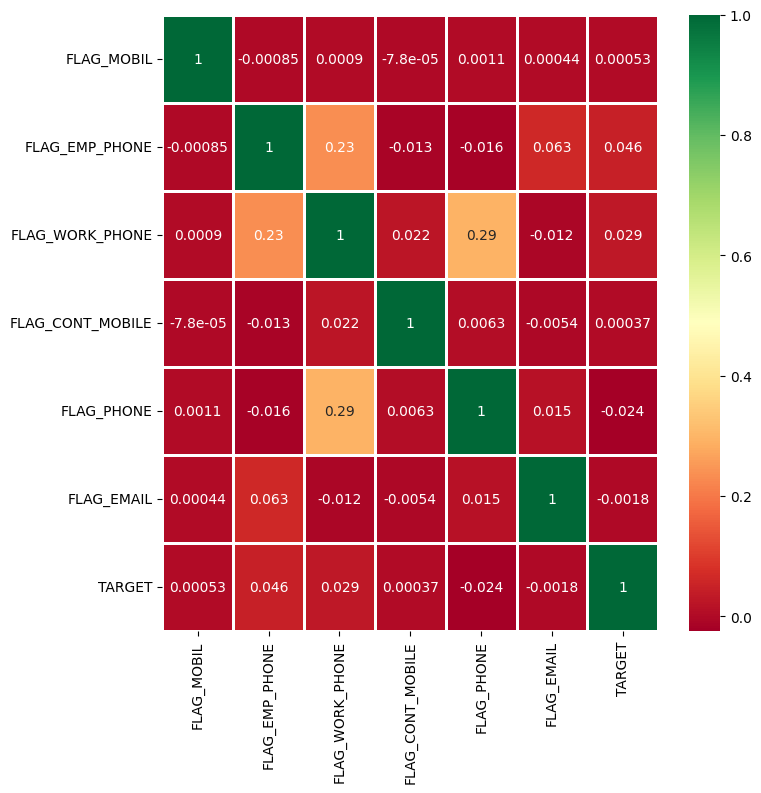

In [ ]:
contact_col = ['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE','FLAG_PHONE', 'FLAG_EMAIL','TARGET']
Contact_corr = app_df[contact_col].corr()
fig = plt.figure(figsize=(8,8))
ax = sns.heatmap(Contact_corr,
            xticklabels=Contact_corr.columns,
            yticklabels=Contact_corr.columns,
            annot = True,
            cmap ="RdYlGn",
            linewidth=1)

**There is no correlation between flags of mobile phone, email with loan. these columns can be deleted**

In [ ]:
app_df.drop(['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE','FLAG_PHONE', 'FLAG_EMAIL'], axis=1, inplace=True)\



*In Previous File*


Keeping key financial & status indicators: NAME_CONTRACT_TYPE, AMT_ANNUITY, AMT_CREDIT, NAME_CONTRACT_STATUS, DAYS_DECISION, CNT_PAYMENT, CODE_REJECT_REASON.

Dropping redundant identifiers & metadata: SK_ID_PREV, WEEKDAY_APPR_PROCESS_START, FLAG_LAST_APPL_PER_CONTRACT, NAME_TYPE_SUITE, CHANNEL_TYPE, SELLERPLACE_AREA.


In [ ]:
prev_app_df.drop(["SK_ID_PREV", "WEEKDAY_APPR_PROCESS_START", "FLAG_LAST_APPL_PER_CONTRACT", "NAME_TYPE_SUITE", "CHANNEL_TYPE", "SELLERPLACE_AREA"] , inplace=True, axis=1)

In [ ]:
prev_app_df['DAYS_DECISION'] = abs(prev_app_df['DAYS_DECISION'])

In [ ]:
display(desc_col)

,Unnamed: 0,Table,Row,Description,Special
0,1,application_data,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_data,TARGET,"Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)",NaN
2,5,application_data,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_data,CODE_GENDER,Gender of the client,NaN
4,7,application_data,FLAG_OWN_CAR,Flag if the client owns a car,NaN
5,8,application_data,FLAG_OWN_REALTY,Flag if client owns a house or flat,NaN
6,9,application_data,CNT_CHILDREN,Number of children the client has,NaN
7,10,application_data,AMT_INCOME_TOTAL,Income of the client,NaN
8,11,application_data,AMT_CREDIT,Credit amount of the loan,NaN
9,12,application_data,AMT_ANNUITY,Loan annuity,NaN


In [ ]:
prev_app_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 31 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   SK_ID_CURR                 1670214 non-null  int64  
 1   NAME_CONTRACT_TYPE         1670214 non-null  object 
 2   AMT_ANNUITY                1297979 non-null  float64
 3   AMT_APPLICATION            1670214 non-null  float64
 4   AMT_CREDIT                 1670213 non-null  float64
 5   AMT_DOWN_PAYMENT           774370 non-null   float64
 6   AMT_GOODS_PRICE            1284699 non-null  float64
 7   HOUR_APPR_PROCESS_START    1670214 non-null  int64  
 8   NFLAG_LAST_APPL_IN_DAY     1670214 non-null  int64  
 9   RATE_DOWN_PAYMENT          774370 non-null   float64
 10  RATE_INTEREST_PRIMARY      5951 non-null     float64
 11  RATE_INTEREST_PRIVILEGED   5951 non-null     float64
 12  NAME_CASH_LOAN_PURPOSE     1670214 non-null  object 
 13  NAME_CONTRAC

# EDA (Data cleansing and preparation, Insightful visuals)

## Cleaning The Data

### **Handling Missing Values**

In [ ]:
# Check the percentage and number of Missing Values
def check_per_nulls(df):
  null_percentage = (df.isnull().sum() / len(df)) * 100
  null_counts = df.isnull().sum()

  null_percentage_df = pd.DataFrame({'Column': df.columns,  'Number of Nulls': null_counts , "Length of DF" : len(df), 'Null Percentage': null_percentage})
  null_percentage_df.index = range(len(null_percentage_df))
  print(null_percentage_df)


In [ ]:
check_per_nulls(app_df)

                          Column  Number of Nulls  Length of DF  Null Percentage
0   SK_ID_CURR                    0                307511        0.000000       
1   TARGET                        0                307511        0.000000       
2   NAME_CONTRACT_TYPE            0                307511        0.000000       
3   CODE_GENDER                   0                307511        0.000000       
4   FLAG_OWN_CAR                  0                307511        0.000000       
5   FLAG_OWN_REALTY               0                307511        0.000000       
6   CNT_CHILDREN                  0                307511        0.000000       
7   AMT_INCOME_TOTAL              0                307511        0.000000       
8   AMT_CREDIT                    0                307511        0.000000       
9   AMT_ANNUITY                   12               307511        0.003902       
10  AMT_GOODS_PRICE               278              307511        0.090403       
11  NAME_TYPE_SUITE         

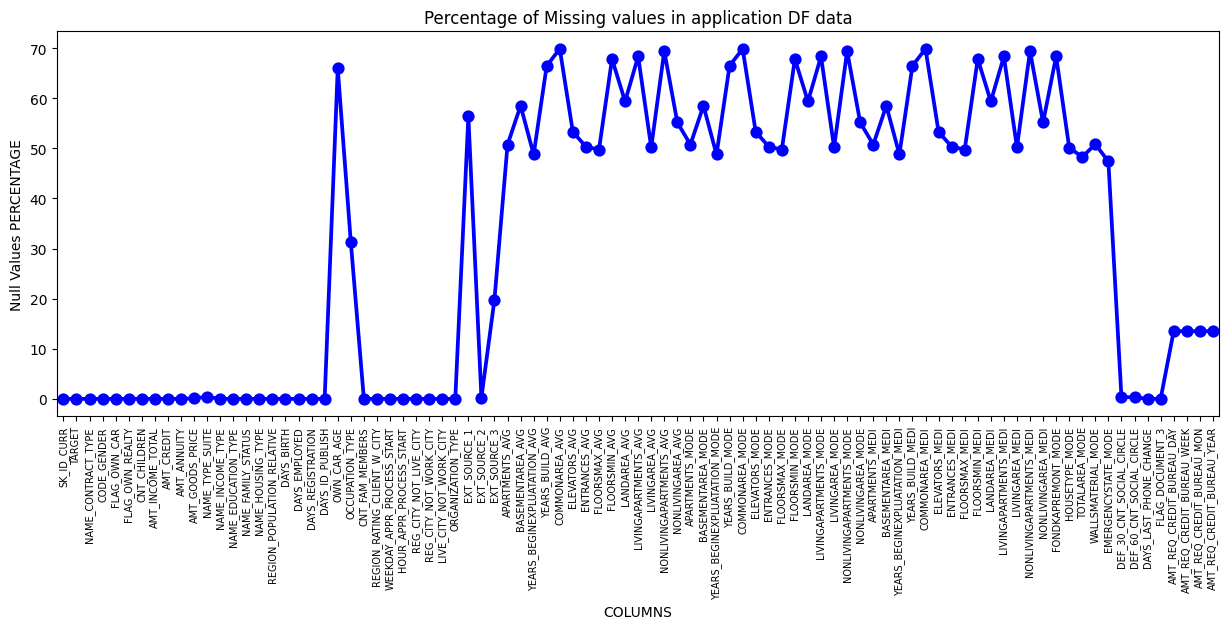

In [ ]:
null_appDF = pd.DataFrame((app_df.isnull().sum())*100/app_df.shape[0]).reset_index()
null_appDF.columns = ['Column Name', 'Null Values Percentage']
fig = plt.figure(figsize=(15,5))
ax = sns.pointplot(x="Column Name",y="Null Values Percentage",data=null_appDF,color ='blue')
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values in application DF data")
plt.ylabel("Null Values PERCENTAGE")
plt.xlabel("COLUMNS")
plt.show()

**Several columns in the applicationDF dataframe have more than 40% missing values.Visualize these columns against their missing value percentages, using 40% as the threshold.**

---



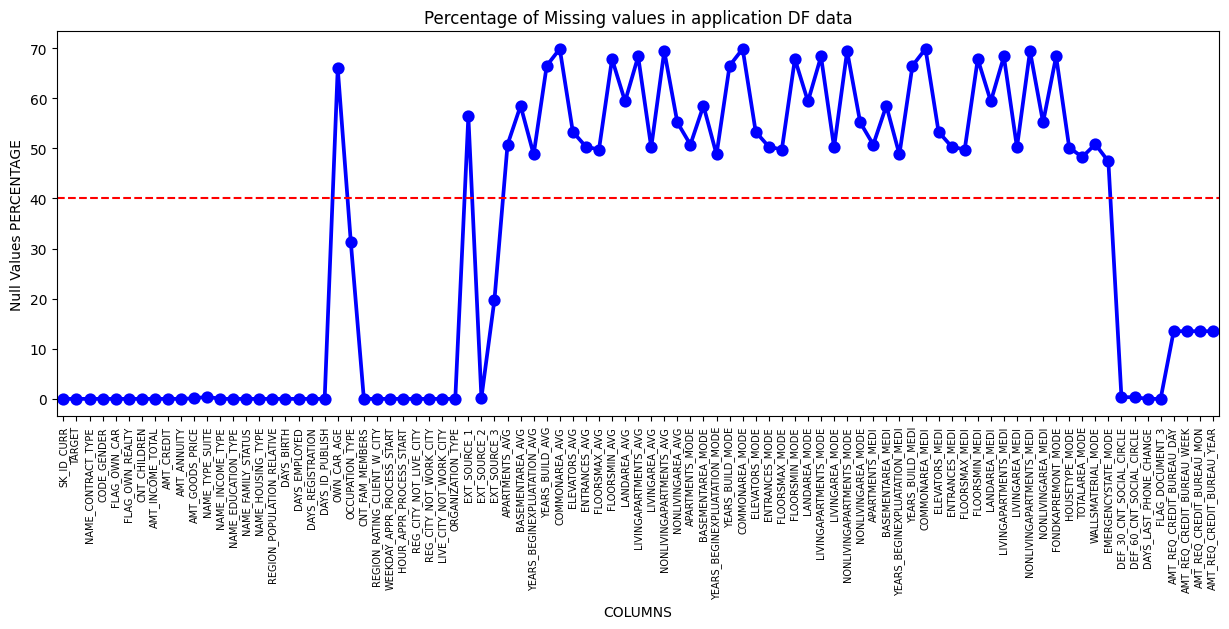

In [ ]:
null_appDF = pd.DataFrame((app_df.isnull().sum())*100/app_df.shape[0]).reset_index()
null_appDF.columns = ['Column Name', 'Null Values Percentage']
fig = plt.figure(figsize=(15,5))
ax = sns.pointplot(x="Column Name",y="Null Values Percentage",data=null_appDF,color ='blue')
plt.xticks(rotation =90,fontsize =7)
ax.axhline(40, ls='--',color='red')
plt.title("Percentage of Missing values in application DF data")
plt.ylabel("Null Values PERCENTAGE")
plt.xlabel("COLUMNS")
plt.show()

In [ ]:
check_per_nulls(prev_app_df)

                       Column  Number of Nulls  Length of DF  Null Percentage
0   SK_ID_CURR                 0                1670214       0.000000       
1   NAME_CONTRACT_TYPE         0                1670214       0.000000       
2   AMT_ANNUITY                372235           1670214       22.286665      
3   AMT_APPLICATION            0                1670214       0.000000       
4   AMT_CREDIT                 1                1670214       0.000060       
5   AMT_DOWN_PAYMENT           895844           1670214       53.636480      
6   AMT_GOODS_PRICE            385515           1670214       23.081773      
7   HOUR_APPR_PROCESS_START    0                1670214       0.000000       
8   NFLAG_LAST_APPL_IN_DAY     0                1670214       0.000000       
9   RATE_DOWN_PAYMENT          895844           1670214       53.636480      
10  RATE_INTEREST_PRIMARY      1664263          1670214       99.643698      
11  RATE_INTEREST_PRIVILEGED   1664263          1670214       99

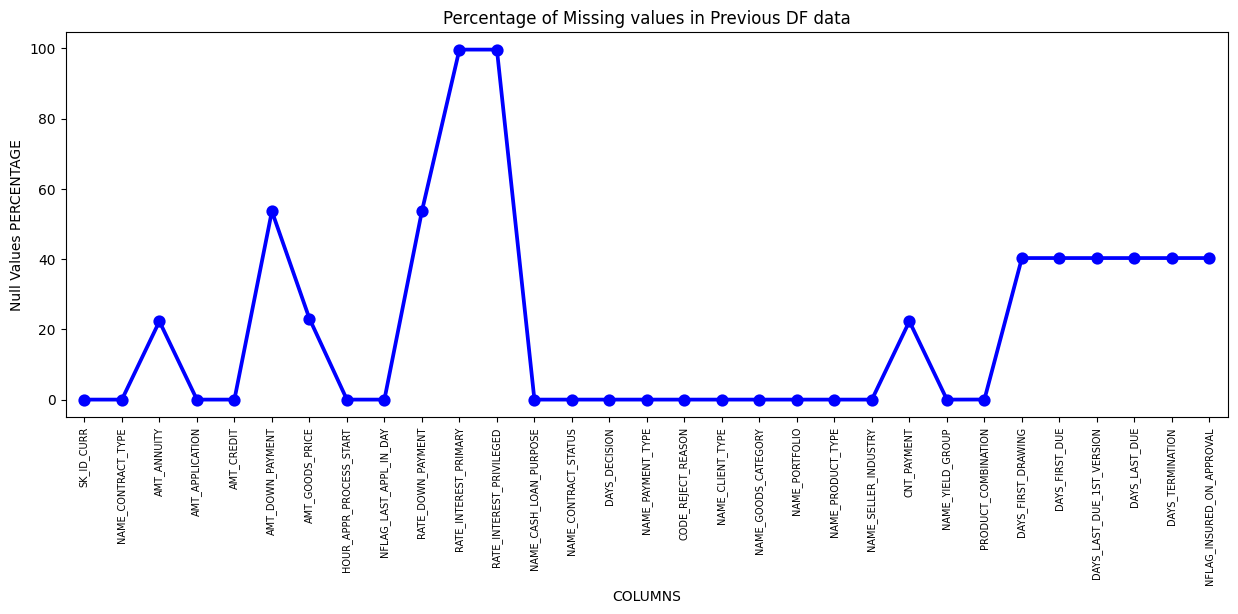

In [ ]:
null_prevDF = pd.DataFrame((prev_app_df.isnull().sum())*100/prev_app_df.shape[0]).reset_index()
null_prevDF.columns = ['Column Name', 'Null Values Percentage']
fig = plt.figure(figsize=(15,5))
ax = sns.pointplot(x="Column Name",y="Null Values Percentage",data=null_prevDF,color ='blue')
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values in Previous DF data")
plt.ylabel("Null Values PERCENTAGE")
plt.xlabel("COLUMNS")
plt.show()

**As per Industrial Standard, max Threshold limit can be between 40% to 50 % depending upon the data acquired in specific sector.**

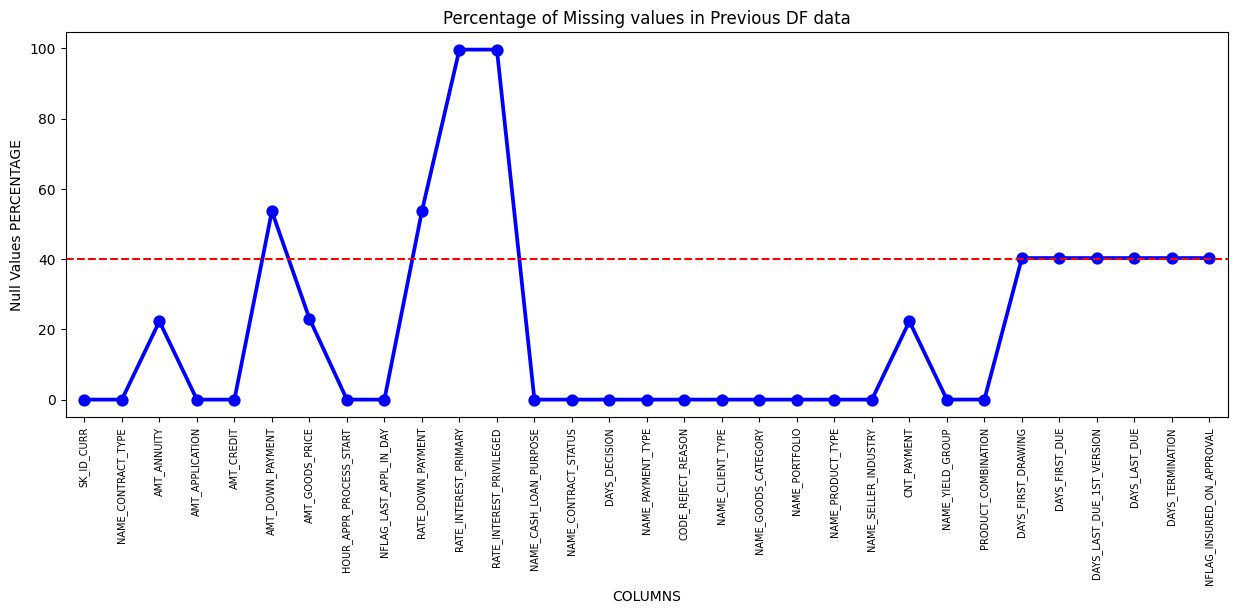

In [ ]:
null_prevDF = pd.DataFrame((prev_app_df.isnull().sum())*100/prev_app_df.shape[0]).reset_index()
null_prevDF.columns = ['Column Name', 'Null Values Percentage']
fig = plt.figure(figsize=(15,5))
ax = sns.pointplot(x="Column Name",y="Null Values Percentage",data=null_prevDF,color ='blue')
plt.xticks(rotation =90,fontsize =7)
ax.axhline(40, ls='--',color='red')
plt.title("Percentage of Missing values in Previous DF data")
plt.ylabel("Null Values PERCENTAGE")
plt.xlabel("COLUMNS")
plt.show()

In [ ]:
null_percentage1 = (prev_app_df.isnull().sum() / len(prev_app_df)) * 100
null_percentage2 = (app_df.isnull().sum() / len(app_df)) * 100
null_percentage1[null_percentage1 >= 50].index

Index(['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY', 'RATE_INTEREST_PRIVILEGED'], dtype='object')

In [ ]:
null_percentage2[null_percentage2 >= 40].index

Index(['OWN_CAR_AGE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'TOTALAREA_MODE', 'WALLSMATERIAL_MODE',
       'EMERGE

**After Checking there aren't have a common columns between two files So We Start Drop the Columns above the Thershold**

In [ ]:
# Handling Missing Values in Previous file (Drop Columns has more than or equal 50% of missing values)
null_percentage = (prev_app_df.isnull().sum() / len(prev_app_df)) * 100
prev_app_df.drop(null_percentage[null_percentage >= 40].index, axis=1, inplace=True)

In [ ]:
# Handling Missing Values in Application file (Drop Columns has more than or equal 40% of missing values)
null_percentage = (app_df.isnull().sum() / len(app_df)) * 100
app_df.drop(null_percentage[null_percentage >= 40].index, axis=1, inplace=True)

In [ ]:
check_per_nulls(app_df)

                         Column  Number of Nulls  Length of DF  Null Percentage
0   SK_ID_CURR                   0                307511        0.000000       
1   TARGET                       0                307511        0.000000       
2   NAME_CONTRACT_TYPE           0                307511        0.000000       
3   CODE_GENDER                  0                307511        0.000000       
4   FLAG_OWN_CAR                 0                307511        0.000000       
5   FLAG_OWN_REALTY              0                307511        0.000000       
6   CNT_CHILDREN                 0                307511        0.000000       
7   AMT_INCOME_TOTAL             0                307511        0.000000       
8   AMT_CREDIT                   0                307511        0.000000       
9   AMT_ANNUITY                  12               307511        0.003902       
10  AMT_GOODS_PRICE              278              307511        0.090403       
11  NAME_TYPE_SUITE              1292   

In [ ]:
check_per_nulls(prev_app_df)

                     Column  Number of Nulls  Length of DF  Null Percentage
0   SK_ID_CURR               0                1670214       0.000000       
1   NAME_CONTRACT_TYPE       0                1670214       0.000000       
2   AMT_ANNUITY              372235           1670214       22.286665      
3   AMT_APPLICATION          0                1670214       0.000000       
4   AMT_CREDIT               1                1670214       0.000060       
5   AMT_GOODS_PRICE          385515           1670214       23.081773      
6   HOUR_APPR_PROCESS_START  0                1670214       0.000000       
7   NFLAG_LAST_APPL_IN_DAY   0                1670214       0.000000       
8   NAME_CASH_LOAN_PURPOSE   0                1670214       0.000000       
9   NAME_CONTRACT_STATUS     0                1670214       0.000000       
10  DAYS_DECISION            0                1670214       0.000000       
11  NAME_PAYMENT_TYPE        0                1670214       0.000000       
12  CODE_REJ

**Check Common Columns and it's Null Values Comparison**

In [ ]:
common_columns = list((set(app_df.columns) & set(prev_app_df.columns)) - {"SK_ID_CURR"})
print(common_columns)

nulls_df1 = app_df[common_columns].isnull().sum().rename('App_Nulls')
nulls_df2 = prev_app_df[common_columns].isnull().sum().rename('Prev_Nulls')

null_comparison = pd.concat([nulls_df1, nulls_df2], axis=1)

print(null_comparison)


['NAME_CONTRACT_TYPE', 'AMT_GOODS_PRICE', 'HOUR_APPR_PROCESS_START', 'AMT_CREDIT', 'AMT_ANNUITY']
                         App_Nulls  Prev_Nulls
NAME_CONTRACT_TYPE       0          0         
AMT_GOODS_PRICE          278        385515    
HOUR_APPR_PROCESS_START  0          0         
AMT_CREDIT               0          1         
AMT_ANNUITY              12         372235    


**Application File**

In [ ]:
categorical_cols = app_df.select_dtypes(include=['object', 'category']).columns.tolist()

numerical_cols = app_df.select_dtypes(include=['number']).columns.tolist()

In [ ]:
categorical_cols , numerical_cols

(['NAME_CONTRACT_TYPE',
  'CODE_GENDER',
  'FLAG_OWN_CAR',
  'FLAG_OWN_REALTY',
  'NAME_TYPE_SUITE',
  'NAME_INCOME_TYPE',
  'NAME_EDUCATION_TYPE',
  'NAME_FAMILY_STATUS',
  'NAME_HOUSING_TYPE',
  'OCCUPATION_TYPE',
  'WEEKDAY_APPR_PROCESS_START',
  'ORGANIZATION_TYPE'],
 ['SK_ID_CURR',
  'TARGET',
  'CNT_CHILDREN',
  'AMT_INCOME_TOTAL',
  'AMT_CREDIT',
  'AMT_ANNUITY',
  'AMT_GOODS_PRICE',
  'REGION_POPULATION_RELATIVE',
  'DAYS_BIRTH',
  'DAYS_EMPLOYED',
  'DAYS_REGISTRATION',
  'DAYS_ID_PUBLISH',
  'CNT_FAM_MEMBERS',
  'REGION_RATING_CLIENT_W_CITY',
  'HOUR_APPR_PROCESS_START',
  'REG_CITY_NOT_LIVE_CITY',
  'REG_CITY_NOT_WORK_CITY',
  'LIVE_CITY_NOT_WORK_CITY',
  'EXT_SOURCE_2',
  'EXT_SOURCE_3',
  'DEF_30_CNT_SOCIAL_CIRCLE',
  'DEF_60_CNT_SOCIAL_CIRCLE',
  'DAYS_LAST_PHONE_CHANGE',
  'FLAG_DOCUMENT_3',
  'AMT_REQ_CREDIT_BUREAU_DAY',
  'AMT_REQ_CREDIT_BUREAU_WEEK',
  'AMT_REQ_CREDIT_BUREAU_MON',
  'AMT_REQ_CREDIT_BUREAU_YEAR'])

In [ ]:
check_per_nulls(app_df)

                         Column  Number of Nulls  Length of DF  Null Percentage
0   SK_ID_CURR                   0                307511        0.000000       
1   TARGET                       0                307511        0.000000       
2   NAME_CONTRACT_TYPE           0                307511        0.000000       
3   CODE_GENDER                  0                307511        0.000000       
4   FLAG_OWN_CAR                 0                307511        0.000000       
5   FLAG_OWN_REALTY              0                307511        0.000000       
6   CNT_CHILDREN                 0                307511        0.000000       
7   AMT_INCOME_TOTAL             0                307511        0.000000       
8   AMT_CREDIT                   0                307511        0.000000       
9   AMT_ANNUITY                  12               307511        0.003902       
10  AMT_GOODS_PRICE              278              307511        0.090403       
11  NAME_TYPE_SUITE              1292   

### Categorical Columns

**Impute categorical variable 'NAME_TYPE_SUITE' which has lower null percentage(0.42%) with the most frequent category using mode**

In [ ]:
app_df['NAME_TYPE_SUITE'].describe()


,NAME_TYPE_SUITE
count,306219
unique,7
top,Unaccompanied
freq,248526


In [ ]:
# Make a Relationship to impute more Accurate mode
group = app_df.groupby(['FLAG_OWN_REALTY', 'FLAG_OWN_CAR']).agg(lambda x: x.mode().iloc[0])
group['NAME_TYPE_SUITE']


FLAG_OWN_REALTY  FLAG_OWN_CAR
N                N               Unaccompanied
                 Y               Unaccompanied
Y                N               Unaccompanied
                 Y               Unaccompanied
Name: NAME_TYPE_SUITE, dtype: object

In [ ]:
app_df['NAME_TYPE_SUITE'].unique()

array(['Unaccompanied', 'Family', 'Spouse, partner', 'Children',
       'Other_A', nan, 'Other_B', 'Group of people'], dtype=object)

In [ ]:
app_df['NAME_TYPE_SUITE'].fillna(group.loc[(app_df['FLAG_OWN_REALTY'], app_df['FLAG_OWN_CAR']), 'NAME_TYPE_SUITE'].mode().iloc[0], inplace=True)



**Impute categorical variable 'OCCUPATION_TYPE' which has higher null percentage(31.35%) with a new category as assigning to any existing category might influence the analysis**

In [ ]:
app_df['OCCUPATION_TYPE'].fillna('Unknown', inplace =True)


### Numerical Columns

**Impute numerical variables with the median as there are no outliers that can be seen from results of describe and mean**

In [ ]:
app_df[['AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK',
               'AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_YEAR']].describe()

,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_YEAR
count,265992.000000,265992.000000,265992.000000,265992.000000
mean,0.007000,0.034362,0.267395,1.899974
std,0.110757,0.204685,0.916002,1.869295
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.000000,0.000000,3.000000
max,9.000000,8.000000,27.000000,25.000000


**Impute with median**

In [ ]:
cols = ['AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_YEAR']

for col in cols:
    app_df[col].fillna(app_df[col].median(),inplace = True)

**DEF_30_CNT_SOCIAL_CIRCLE We can Fill with Median**

In [ ]:
app_df['DEF_60_CNT_SOCIAL_CIRCLE'].describe()


,DEF_60_CNT_SOCIAL_CIRCLE
count,306490.000000
mean,0.100049
std,0.362291
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,24.000000


In [ ]:
app_df['DEF_60_CNT_SOCIAL_CIRCLE'].fillna(app_df['DEF_60_CNT_SOCIAL_CIRCLE'].median(),inplace = True)

**I think we can work on the 60 Days only**

In [ ]:
app_df.drop('DEF_30_CNT_SOCIAL_CIRCLE' , inplace =True , axis =1)

**EXT_SOURCE_3 , EXT_SOURCE_2**

In [ ]:
app_df[['EXT_SOURCE_3' , 'EXT_SOURCE_2']].describe()

,EXT_SOURCE_3,EXT_SOURCE_2
count,246546.000000,3.068510e+05
mean,0.510853,5.143927e-01
std,0.194844,1.910602e-01
min,0.000527,8.173617e-08
25%,0.370650,3.924574e-01
50%,0.535276,5.659614e-01
75%,0.669057,6.636171e-01
max,0.896010,8.549997e-01


In [ ]:
cols = ['EXT_SOURCE_3' , 'EXT_SOURCE_2']

for col in cols:
    app_df[col].fillna(app_df[col].median(),inplace = True)

**We still have few null values in the columns We can ignore as this percentage is very less.**

In [ ]:
app_df.dropna(inplace=True)

In [ ]:
check_per_nulls(app_df)

                         Column  Number of Nulls  Length of DF  Null Percentage
0   SK_ID_CURR                   0                307220        0.0            
1   TARGET                       0                307220        0.0            
2   NAME_CONTRACT_TYPE           0                307220        0.0            
3   CODE_GENDER                  0                307220        0.0            
4   FLAG_OWN_CAR                 0                307220        0.0            
5   FLAG_OWN_REALTY              0                307220        0.0            
6   CNT_CHILDREN                 0                307220        0.0            
7   AMT_INCOME_TOTAL             0                307220        0.0            
8   AMT_CREDIT                   0                307220        0.0            
9   AMT_ANNUITY                  0                307220        0.0            
10  AMT_GOODS_PRICE              0                307220        0.0            
11  NAME_TYPE_SUITE              0      

**Previous File**

In [ ]:
check_per_nulls(prev_app_df)

                     Column  Number of Nulls  Length of DF  Null Percentage
0   SK_ID_CURR               0                1670214       0.000000       
1   NAME_CONTRACT_TYPE       0                1670214       0.000000       
2   AMT_ANNUITY              372235           1670214       22.286665      
3   AMT_APPLICATION          0                1670214       0.000000       
4   AMT_CREDIT               1                1670214       0.000060       
5   AMT_GOODS_PRICE          385515           1670214       23.081773      
6   HOUR_APPR_PROCESS_START  0                1670214       0.000000       
7   NFLAG_LAST_APPL_IN_DAY   0                1670214       0.000000       
8   NAME_CASH_LOAN_PURPOSE   0                1670214       0.000000       
9   NAME_CONTRACT_STATUS     0                1670214       0.000000       
10  DAYS_DECISION            0                1670214       0.000000       
11  NAME_PAYMENT_TYPE        0                1670214       0.000000       
12  CODE_REJ

In [ ]:
categorical_cols = prev_app_df.select_dtypes(include=['object', 'category']).columns.tolist()

numerical_cols = prev_app_df.select_dtypes(include=['number']).columns.tolist()

In [ ]:
categorical_cols , numerical_cols

(['NAME_CONTRACT_TYPE',
  'NAME_CASH_LOAN_PURPOSE',
  'NAME_CONTRACT_STATUS',
  'NAME_PAYMENT_TYPE',
  'CODE_REJECT_REASON',
  'NAME_CLIENT_TYPE',
  'NAME_GOODS_CATEGORY',
  'NAME_PORTFOLIO',
  'NAME_PRODUCT_TYPE',
  'NAME_SELLER_INDUSTRY',
  'NAME_YIELD_GROUP',
  'PRODUCT_COMBINATION'],
 ['SK_ID_CURR',
  'AMT_ANNUITY',
  'AMT_APPLICATION',
  'AMT_CREDIT',
  'AMT_GOODS_PRICE',
  'HOUR_APPR_PROCESS_START',
  'NFLAG_LAST_APPL_IN_DAY',
  'DAYS_DECISION',
  'CNT_PAYMENT'])

In [ ]:
median_annuity = prev_app_df.groupby(['NAME_YIELD_GROUP', 'NAME_CONTRACT_STATUS'])['AMT_ANNUITY'].median()
median_annuity

NAME_YIELD_GROUP  NAME_CONTRACT_STATUS
XNA               Approved                7875.0000 
                  Canceled                9000.0000 
                  Refused                 9000.0000 
                  Unused offer            10125.0000
high              Approved                7869.0150 
                  Canceled                22680.0450
                  Refused                 12737.5200
                  Unused offer            6860.0250 
low_action        Approved                8243.4150 
                  Canceled                36972.0000
                  Refused                 23872.5000
low_normal        Approved                12963.7800
                  Canceled                29565.6750
                  Refused                 22857.9525
                  Unused offer            11919.6000
middle            Approved                12469.7250
                  Canceled                24172.6500
                  Refused                 17319.6900
                  Unused offer            6413.0850 
Name: AMT_ANNUITY, dtype: float64

In [ ]:
median_annuity = prev_app_df.groupby(['NAME_YIELD_GROUP', 'NAME_CONTRACT_STATUS'])['AMT_ANNUITY'].transform('median')

prev_app_df['AMT_ANNUITY'] = prev_app_df['AMT_ANNUITY'].fillna(median_annuity)


In [ ]:
median_annuity = prev_app_df.groupby(['NAME_YIELD_GROUP', 'NAME_CONTRACT_STATUS'])['AMT_GOODS_PRICE'].median()
median_annuity

NAME_YIELD_GROUP  NAME_CONTRACT_STATUS
XNA               Approved                112500.00 
                  Canceled                157500.00 
                  Refused                 135000.00 
                  Unused offer            57096.00  
high              Approved                55521.00  
                  Canceled                252000.00 
                  Refused                 113174.64 
                  Unused offer            43830.00  
low_action        Approved                120019.05 
                  Canceled                1161000.00
                  Refused                 630000.00 
low_normal        Approved                132750.00 
                  Canceled                679500.00 
                  Refused                 463500.00 
                  Unused offer            105097.50 
middle            Approved                114705.00 
                  Canceled                450000.00 
                  Refused                 225000.00 
                  Unused offer            56466.00  
Name: AMT_GOODS_PRICE, dtype: float64

In [ ]:
median_annuity = prev_app_df.groupby(['NAME_YIELD_GROUP', 'NAME_CONTRACT_STATUS'])['AMT_GOODS_PRICE'].transform('median')

prev_app_df['AMT_GOODS_PRICE'] = prev_app_df['AMT_GOODS_PRICE'].fillna(median_annuity)

In [ ]:
median_annuity = prev_app_df.groupby(['NAME_YIELD_GROUP', 'NAME_CONTRACT_STATUS'])['CNT_PAYMENT'].transform('median')

prev_app_df['CNT_PAYMENT'] = prev_app_df['CNT_PAYMENT'].fillna(median_annuity)

In [ ]:
check_per_nulls(prev_app_df)

                     Column  Number of Nulls  Length of DF  Null Percentage
0   SK_ID_CURR               0                1670214       0.000000       
1   NAME_CONTRACT_TYPE       0                1670214       0.000000       
2   AMT_ANNUITY              0                1670214       0.000000       
3   AMT_APPLICATION          0                1670214       0.000000       
4   AMT_CREDIT               1                1670214       0.000060       
5   AMT_GOODS_PRICE          0                1670214       0.000000       
6   HOUR_APPR_PROCESS_START  0                1670214       0.000000       
7   NFLAG_LAST_APPL_IN_DAY   0                1670214       0.000000       
8   NAME_CASH_LOAN_PURPOSE   0                1670214       0.000000       
9   NAME_CONTRACT_STATUS     0                1670214       0.000000       
10  DAYS_DECISION            0                1670214       0.000000       
11  NAME_PAYMENT_TYPE        0                1670214       0.000000       
12  CODE_REJ

In [ ]:
prev_app_df.dropna(inplace=True)

In [ ]:
check_per_nulls(prev_app_df)

                     Column  Number of Nulls  Length of DF  Null Percentage
0   SK_ID_CURR               0                1669867       0.0            
1   NAME_CONTRACT_TYPE       0                1669867       0.0            
2   AMT_ANNUITY              0                1669867       0.0            
3   AMT_APPLICATION          0                1669867       0.0            
4   AMT_CREDIT               0                1669867       0.0            
5   AMT_GOODS_PRICE          0                1669867       0.0            
6   HOUR_APPR_PROCESS_START  0                1669867       0.0            
7   NFLAG_LAST_APPL_IN_DAY   0                1669867       0.0            
8   NAME_CASH_LOAN_PURPOSE   0                1669867       0.0            
9   NAME_CONTRACT_STATUS     0                1669867       0.0            
10  DAYS_DECISION            0                1669867       0.0            
11  NAME_PAYMENT_TYPE        0                1669867       0.0            
12  CODE_REJ

### Handle Duplicates before merging

In [ ]:
prev_app_df.duplicated().sum()

np.int64(58673)

In [ ]:
app_df.duplicated().sum()

np.int64(0)

In [ ]:
prev_app_df.drop_duplicates(inplace=True , keep='first')

In [ ]:
prev_app_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1611194 entries, 0 to 1670213
Data columns (total 21 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   SK_ID_CURR               1611194 non-null  int64  
 1   NAME_CONTRACT_TYPE       1611194 non-null  object 
 2   AMT_ANNUITY              1611194 non-null  float64
 3   AMT_APPLICATION          1611194 non-null  float64
 4   AMT_CREDIT               1611194 non-null  float64
 5   AMT_GOODS_PRICE          1611194 non-null  float64
 6   HOUR_APPR_PROCESS_START  1611194 non-null  int64  
 7   NFLAG_LAST_APPL_IN_DAY   1611194 non-null  int64  
 8   NAME_CASH_LOAN_PURPOSE   1611194 non-null  object 
 9   NAME_CONTRACT_STATUS     1611194 non-null  object 
 10  DAYS_DECISION            1611194 non-null  int64  
 11  NAME_PAYMENT_TYPE        1611194 non-null  object 
 12  CODE_REJECT_REASON       1611194 non-null  object 
 13  NAME_CLIENT_TYPE         1611194 non-null  obje

In [ ]:
prev_app_df['SK_ID_CURR'].nunique()

338857

In [ ]:
app_df['SK_ID_CURR'].nunique()

307220

### EDA with Visualization

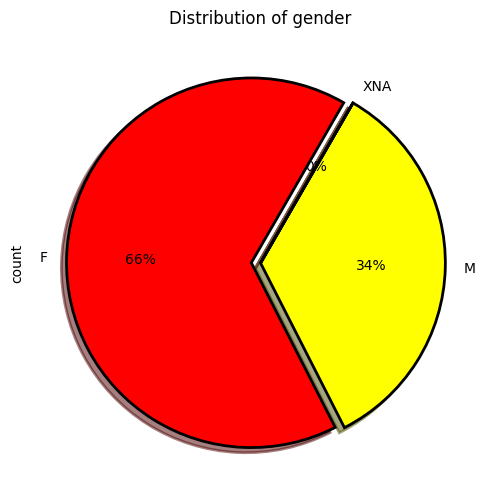

In [ ]:
fig = plt.figure(figsize=(13,6))
app_df["CODE_GENDER"].value_counts().plot.pie(autopct = "%1.0f%%",colors = ["red","yellow"],startangle = 60,
                                                                        wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[.05,0,0],shadow =True)
plt.title("Distribution of gender")
plt.show()

### Distribution of Target variable
TARGET :Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in sample, 0 - all other cases)

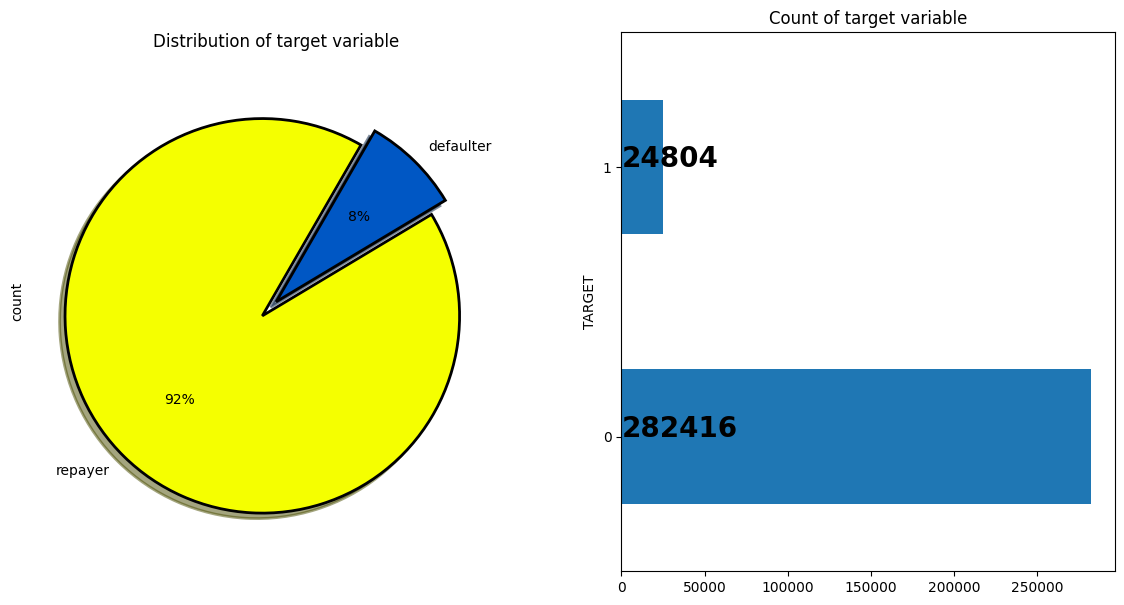

In [ ]:
plt.figure(figsize=(14,7))
plt.subplot(121)
app_df["TARGET"].value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("prism",7),startangle = 60,labels=["repayer","defaulter"],
                                                                        wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[.1,0],shadow =True)
plt.title("Distribution of target variable")

plt.subplot(122)
ax = app_df["TARGET"].value_counts().plot(kind="barh")

for i,j in enumerate(app_df["TARGET"].value_counts().values):
    ax.text(.7,i,j,weight = "bold",fontsize=20)

plt.title("Count of target variable")
plt.show()

**Point to infer from the graph
8% out of total client population have difficulties in repaying loans.**

### Distribution of Contract type by gender

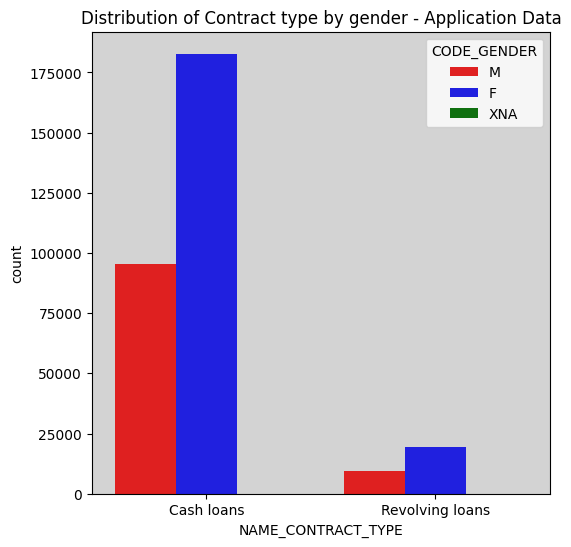

In [ ]:
fig = plt.figure(figsize=(13,6))
plt.subplot(121)

ax = sns.countplot(x="NAME_CONTRACT_TYPE",
                   hue="CODE_GENDER",
                   data=app_df,
                   palette=["r", "b", "g"])

ax.set_facecolor("lightgrey")
ax.set_title("Distribution of Contract type by gender - Application Data")

plt.show()


**Point to infer from the graph
Cash loans is always prefered over Revolving loans by both genders**

### Distribution of client owning a car and by gender

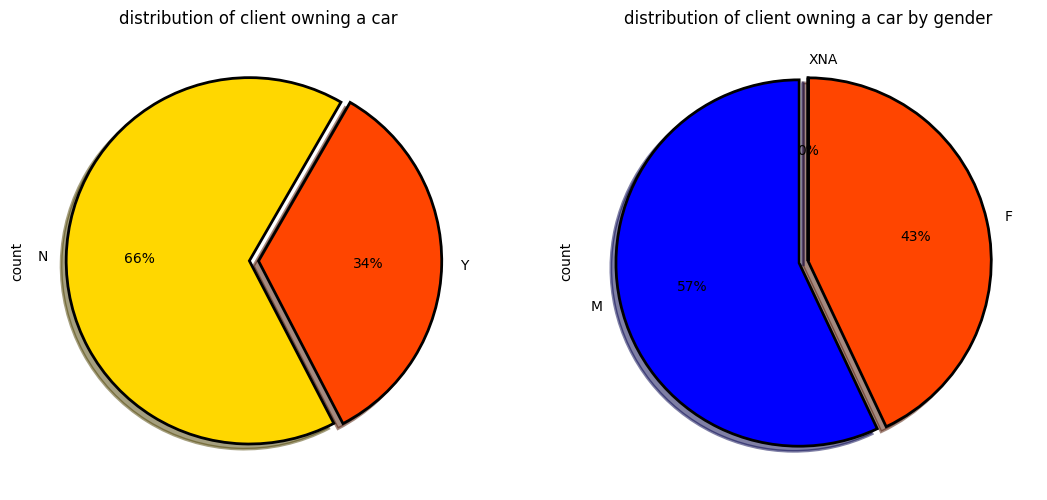

In [ ]:
fig = plt.figure(figsize=(13,6))

plt.subplot(121)
app_df["FLAG_OWN_CAR"].value_counts().plot.pie(autopct = "%1.0f%%",colors = ["gold","orangered"],startangle = 60,
                                                                        wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[.05,0],shadow =True)
plt.title("distribution of client owning a car")

plt.subplot(122)
app_df[app_df["FLAG_OWN_CAR"] == "Y"]["CODE_GENDER"].value_counts().plot.pie(autopct = "%1.0f%%",colors = ["b","orangered"],startangle = 90,
                                                                        wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[.05,0,0],shadow =True)
plt.title("distribution of client owning a car by gender")

plt.show()

**SUBPLOT 1 : Distribution of client owning a car. 34% of clients own a car .**

**SUBPLOT 2 : Distribution of client owning a car by gender. Out of total clients who own car 57% are male and 43% are female.**

### Distribution of Number of children and family members of client by repayment status.

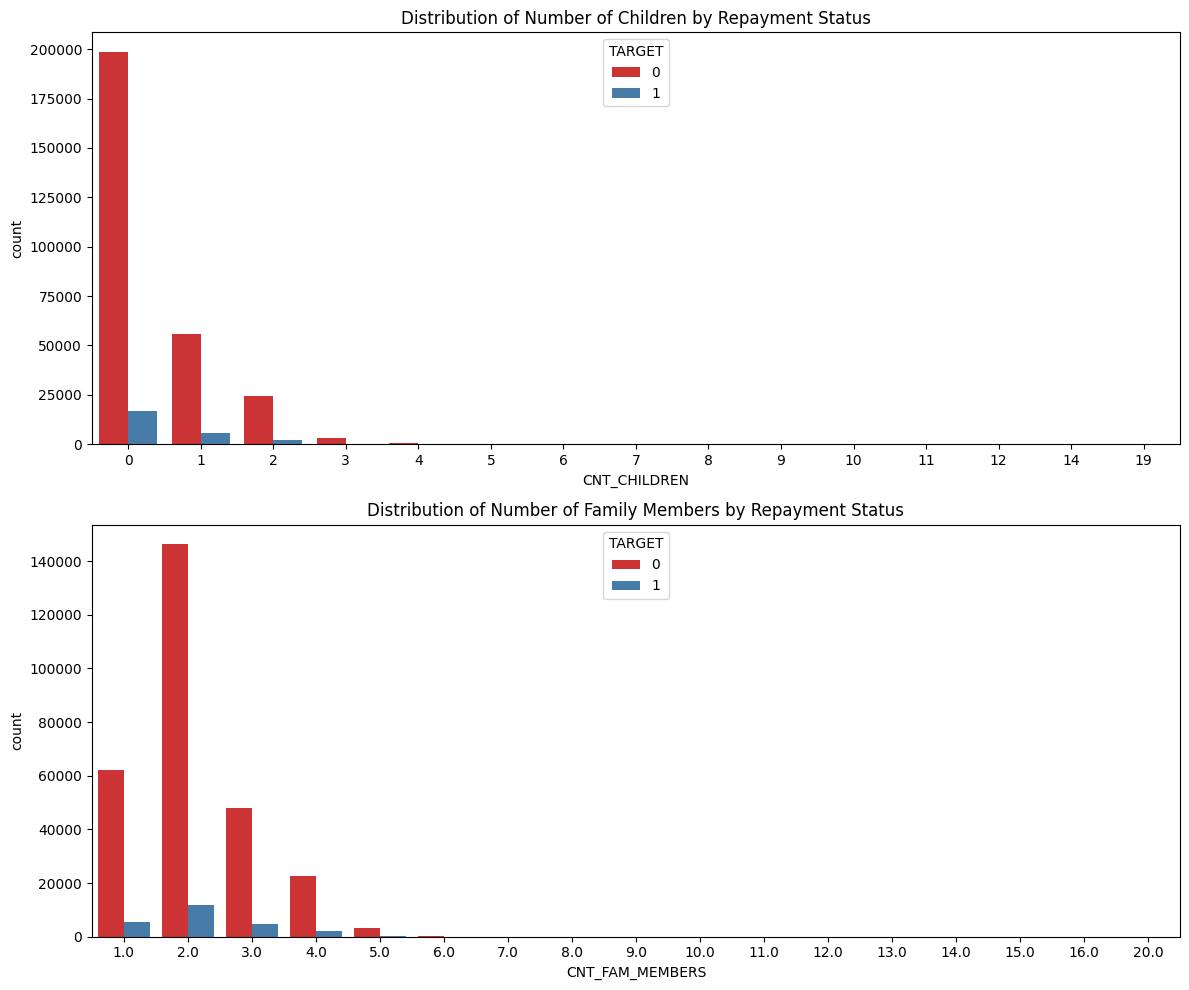

In [ ]:
fig = plt.figure(figsize=(12, 10))

plt.subplot(2, 1, 1)
sns.countplot(
    data=app_df,
    x="CNT_CHILDREN",
    hue="TARGET",
    palette="Set1"
)
plt.legend(title="TARGET", loc="upper center")
plt.title("Distribution of Number of Children by Repayment Status")

plt.subplot(2, 1, 2)
sns.countplot(
    data=app_df,
    x="CNT_FAM_MEMBERS",
    hue="TARGET",
    palette="Set1"
)
plt.legend(loc="upper center", title="TARGET")
plt.title("Distribution of Number of Family Members by Repayment Status")

fig.tight_layout()
plt.show()

### Distribution of contract type ,gender ,own car ,own house with respect to Repayment status(Target variable)

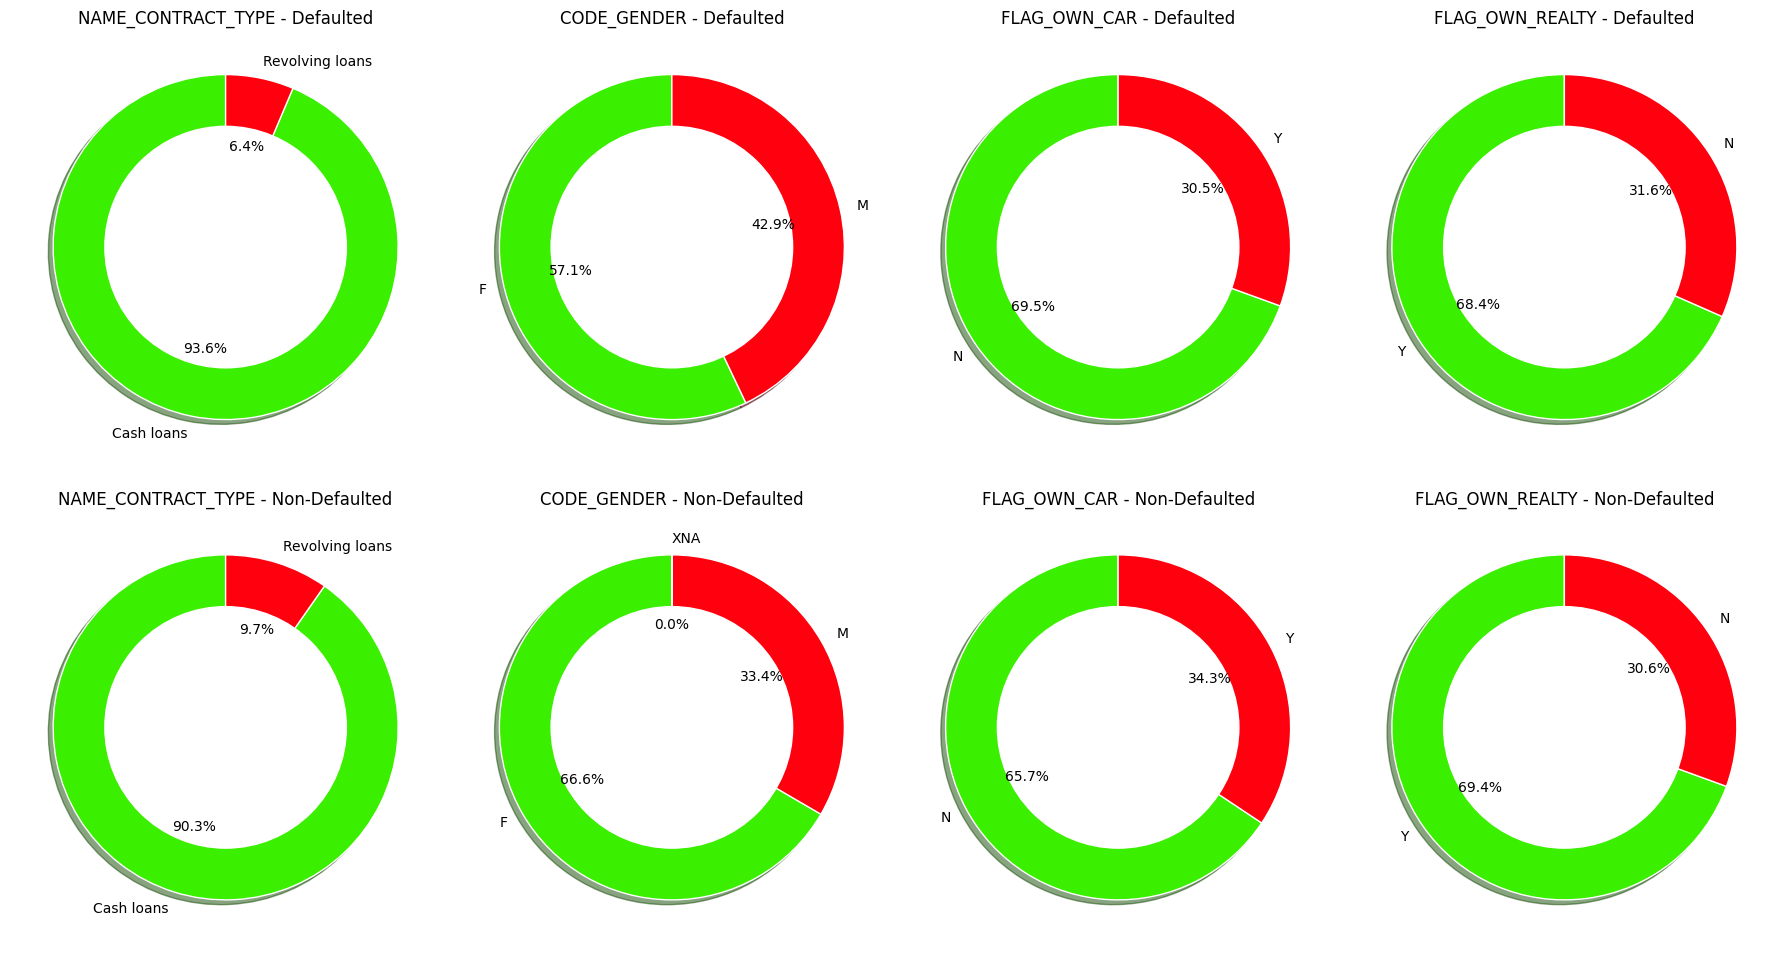

In [ ]:

default_df = app_df[app_df["TARGET"] == 1]
non_default_df = app_df[app_df["TARGET"] == 0]

d_cols = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY']

fig, axes = plt.subplots(2, len(d_cols), figsize=(20, 10))

for i, col in enumerate(d_cols):
    default_counts = default_df[col].value_counts()
    default_counts.plot.pie(
        ax=axes[0, i],
        autopct='%1.1f%%',
        startangle=90,
        colors=sns.color_palette("prism"),
        wedgeprops={"linewidth": 1, "edgecolor": "white"},
        shadow=True
    )
    axes[0, i].set_ylabel('')
    axes[0, i].set_title(f"{col} - Defaulted")

    non_default_counts = non_default_df[col].value_counts()
    non_default_counts.plot.pie(
        ax=axes[1, i],
        autopct='%1.1f%%',
        startangle=90,
        colors=sns.color_palette("prism"),
        wedgeprops={"linewidth": 1, "edgecolor": "white"},
        shadow=True
    )

    for j in [0, 1]:
        circ = plt.Circle((0, 0), 0.7, color="white")
        axes[j, i].add_artist(circ)
        axes[j, i].set_ylabel('')

    axes[0, i].set_title(f"{col} - Defaulted")
    axes[1, i].set_title(f"{col} - Non-Defaulted")

fig.set_size_inches(18, 10)
plt.tight_layout()
plt.show()


**Percentage of males is 10% more in defaults than non defaulters.**

**Percentage of Cash Loans is 4% more in defaults than Revolving Loans.**

### Distribution of amount data


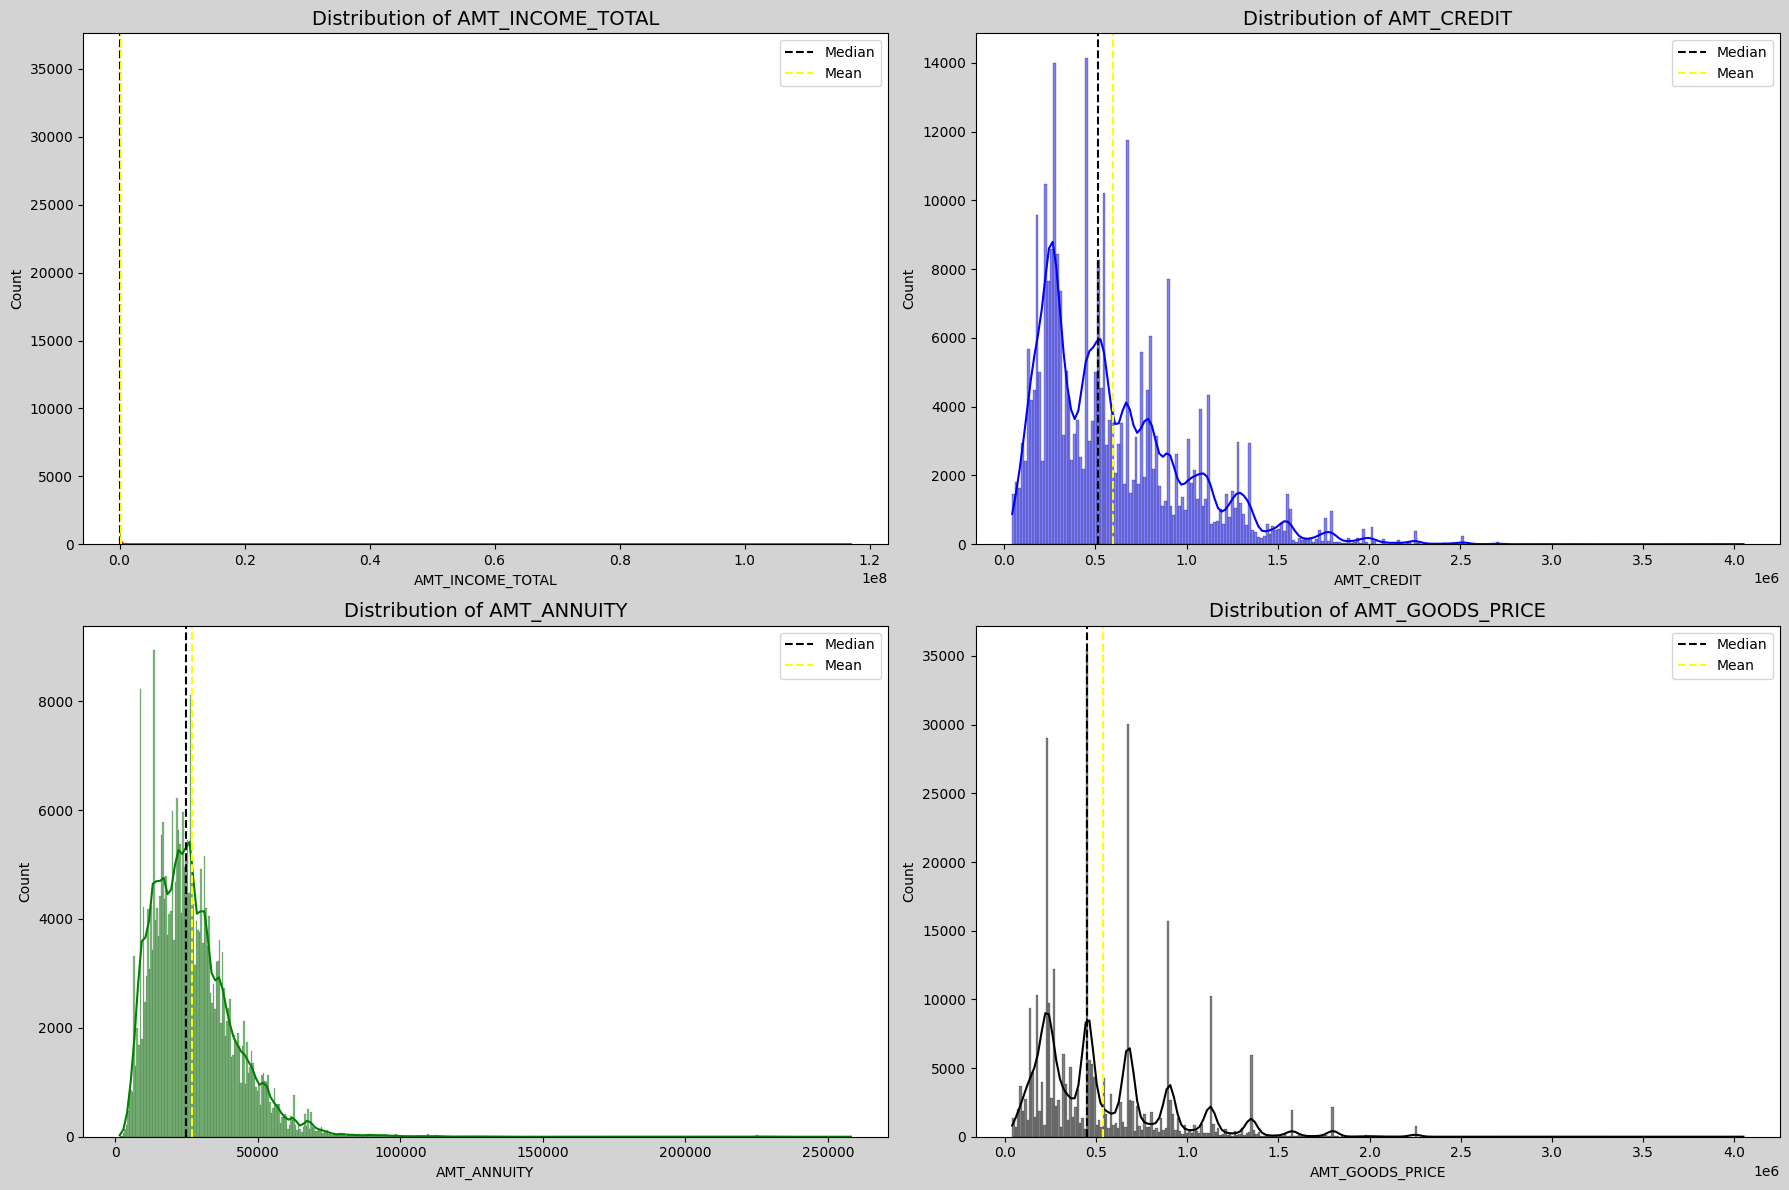

In [ ]:
cols = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE']
colors = ["r", "b", "g", "k"]

fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.set_facecolor("lightgrey")

for col, color, ax in zip(cols, colors, axes.flatten()):
    sns.histplot(app_df[col].dropna(), kde=True, color=color, ax=ax)
    ax.axvline(app_df[col].median(), color='black', linestyle='--', label='Median')
    ax.axvline(app_df[col].mean(), color='yellow', linestyle='--', label='Mean')
    ax.set_title(f"Distribution of {col}", fontsize=14)
    ax.legend()

fig.tight_layout()
plt.show()

### Average Income,credit,annuity & goods_price by gender

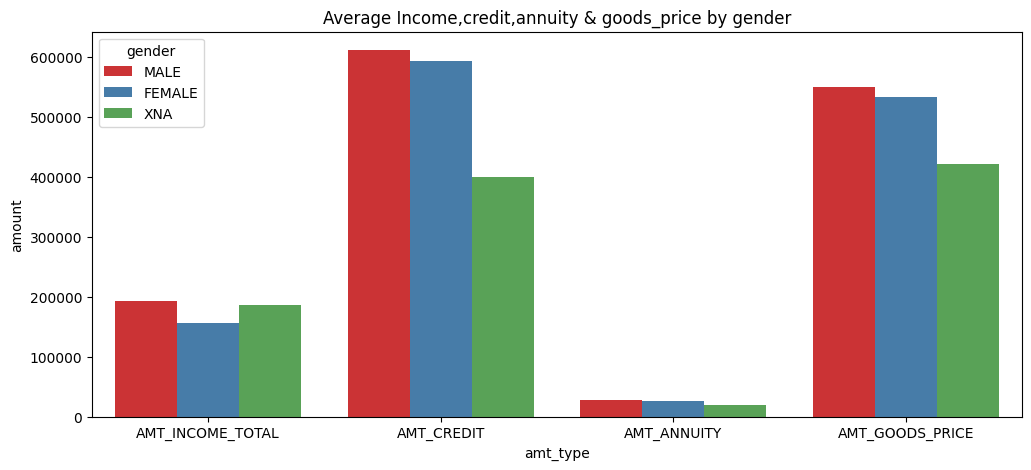

In [ ]:
cols = [ 'AMT_INCOME_TOTAL', 'AMT_CREDIT','AMT_ANNUITY', 'AMT_GOODS_PRICE']

df1 = app_df.groupby("CODE_GENDER")[cols].mean().transpose().reset_index()

df_f   = df1[["index","F"]]
df_f   = df_f.rename(columns={'index':"amt_type", 'F':"amount"})
df_f["gender"] = "FEMALE"
df_m   = df1[["index","M"]]
df_m   = df_m.rename(columns={'index':"amt_type", 'M':"amount"})
df_m["gender"] = "MALE"
df_xna = df1[["index","XNA"]]
df_xna = df_xna.rename(columns={'index':"amt_type", 'XNA':"amount"})
df_xna["gender"] = "XNA"

df_gen = pd.concat([df_m,df_f,df_xna],axis=0)

plt.figure(figsize=(12,5))
ax = sns.barplot(x = "amt_type",y = "amount",data=df_gen,hue="gender",palette="Set1")
plt.title("Average Income,credit,annuity & goods_price by gender")
plt.show()

### Scatter plot between credit amount and annuity amount¶


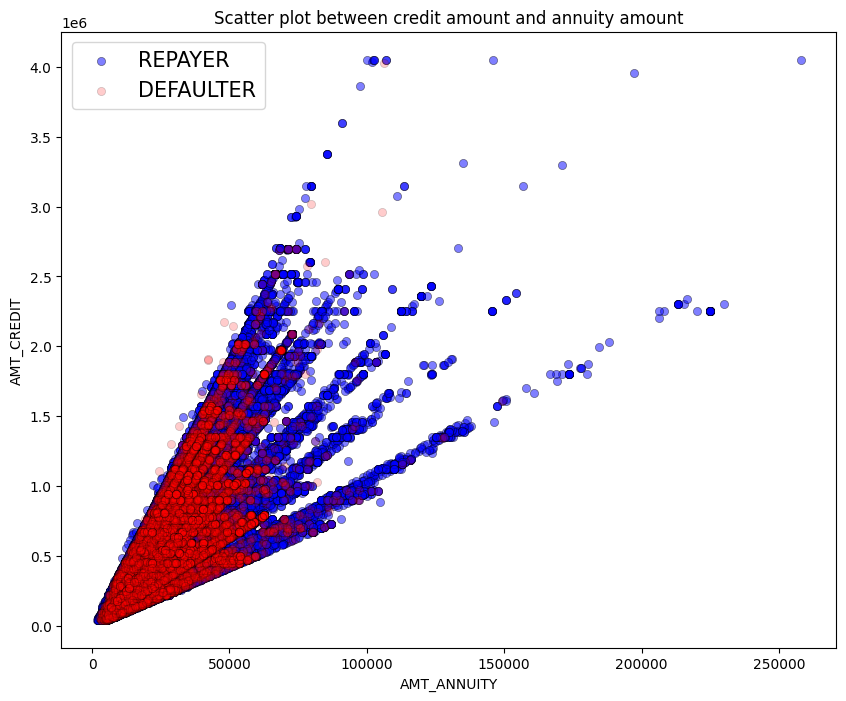

In [ ]:
fig = plt.figure(figsize=(10,8))
plt.scatter(app_df[app_df["TARGET"]==0]['AMT_ANNUITY'],app_df[app_df["TARGET"]==0]['AMT_CREDIT'],s=35,
            color="b",alpha=.5,label="REPAYER",linewidth=.5,edgecolor="k")
plt.scatter(app_df[app_df["TARGET"]==1]['AMT_ANNUITY'],app_df[app_df["TARGET"]==1]['AMT_CREDIT'],s=35,
            color="r",alpha=.2,label="DEFAULTER",linewidth=.5,edgecolor="k")
plt.legend(loc="best",prop={"size":15})
plt.xlabel("AMT_ANNUITY")
plt.ylabel("AMT_CREDIT")
plt.title("Scatter plot between credit amount and annuity amount")
plt.show()

### Pair Plot between amount variables

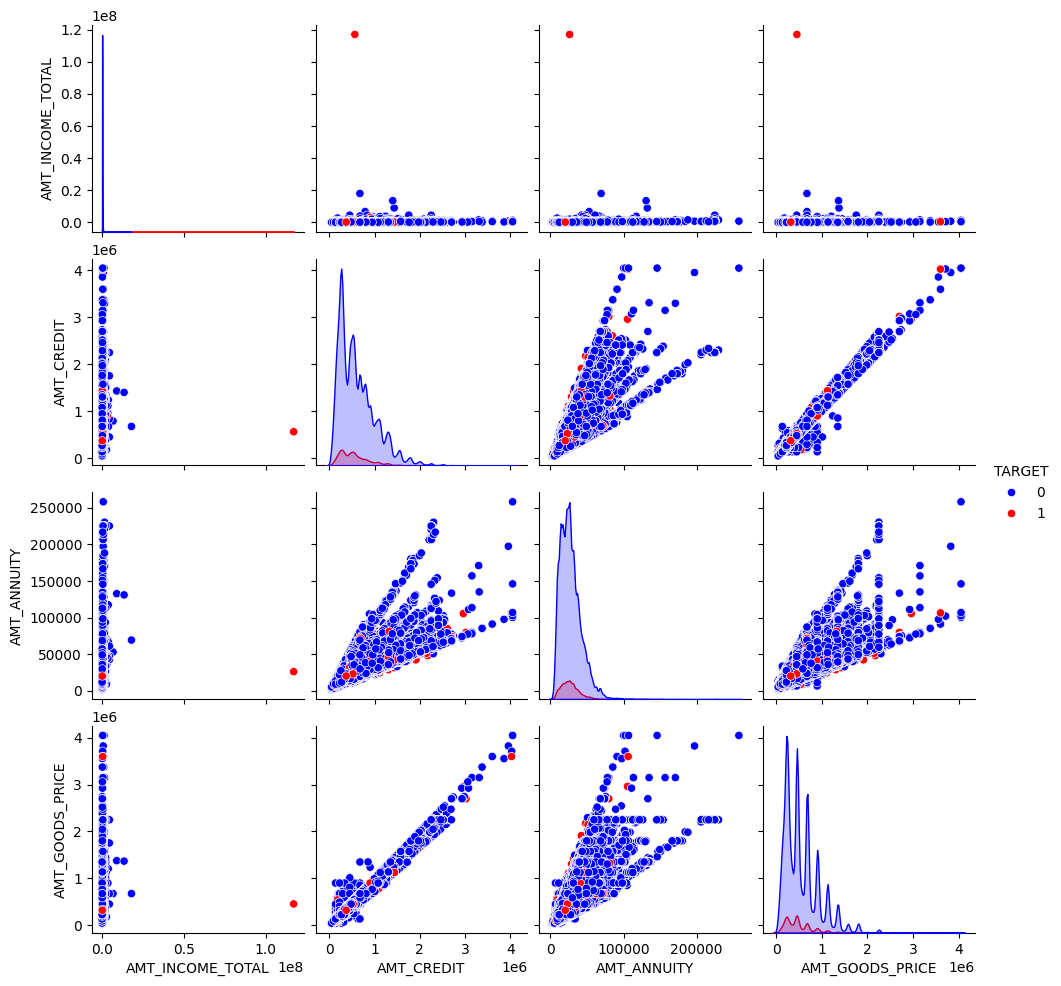

In [ ]:
amt = app_df[[ 'AMT_INCOME_TOTAL','AMT_CREDIT',
                         'AMT_ANNUITY', 'AMT_GOODS_PRICE',"TARGET"]]
amt = amt[(amt["AMT_GOODS_PRICE"].notnull()) & (amt["AMT_ANNUITY"].notnull())]
sns.pairplot(amt,hue="TARGET",palette=["b","r"])
plt.show()

### Distribution of Education type by loan repayment status

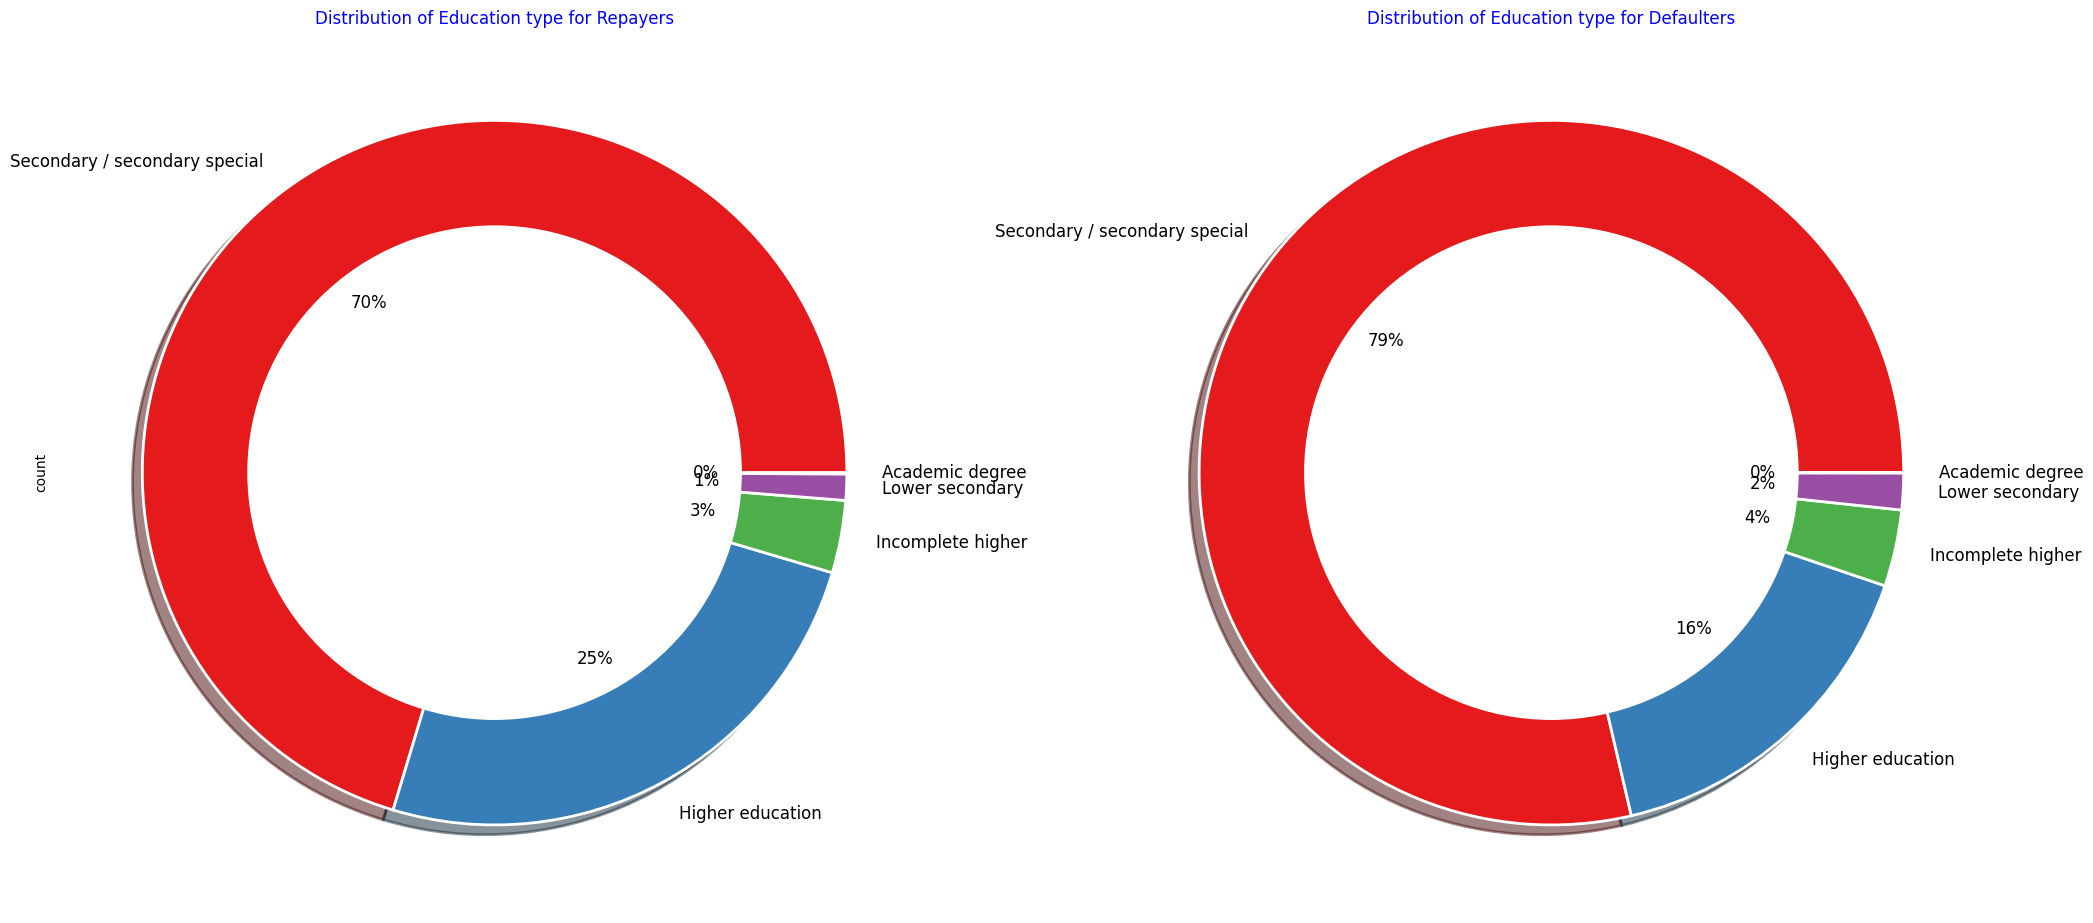

In [ ]:
plt.figure(figsize=(25,25))
plt.subplot(121)
app_df[app_df["TARGET"]==0]["NAME_EDUCATION_TYPE"].value_counts().plot.pie(fontsize=12,autopct = "%1.0f%%",
                                                                                                 colors = sns.color_palette("Set1"),
                                              wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True)
circ = plt.Circle((0,0),.7,color="white")
plt.gca().add_artist(circ)
plt.title("Distribution of Education type for Repayers",color="b")

plt.subplot(122)
app_df[app_df["TARGET"]==1]["NAME_EDUCATION_TYPE"].value_counts().plot.pie(fontsize=12,autopct = "%1.0f%%",
                                                                                                 colors = sns.color_palette("Set1"),
                                              wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True)
circ = plt.Circle((0,0),.7,color="white")
plt.gca().add_artist(circ)
plt.title("Distribution of Education type for Defaulters",color="b")
plt.ylabel("")
plt.show()

**Clients who default have proportionally 9% less higher education compared to clients who do not default.**

### Average Earnings by different professions and education types

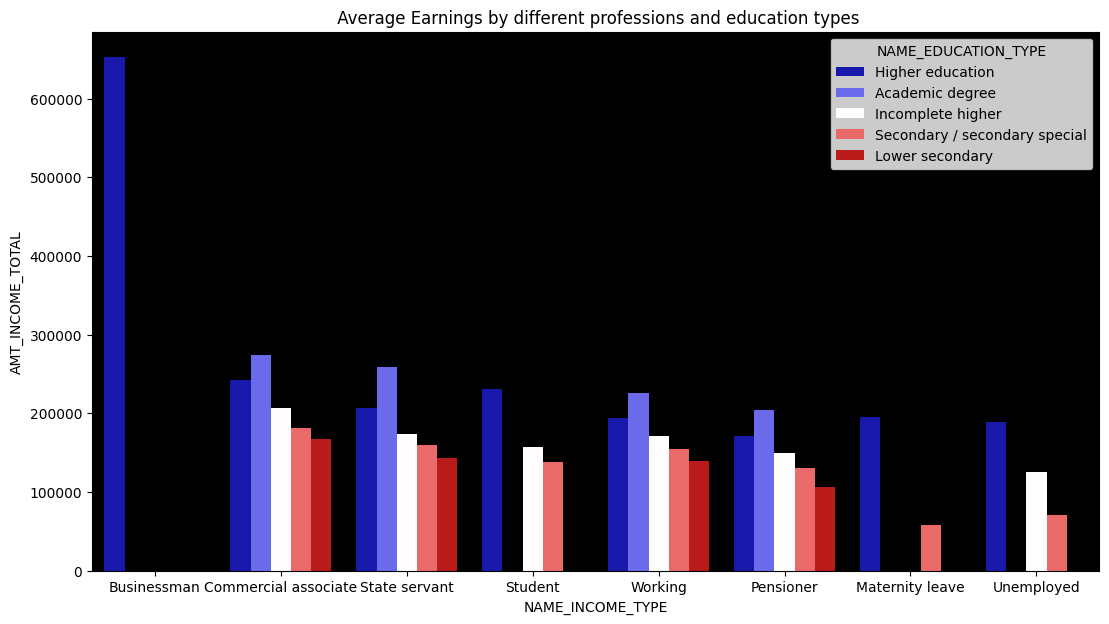

In [ ]:
edu = app_df.groupby(['NAME_EDUCATION_TYPE','NAME_INCOME_TYPE'])['AMT_INCOME_TOTAL'].mean().reset_index().sort_values(by='AMT_INCOME_TOTAL',ascending=False)
fig = plt.figure(figsize=(13,7))
ax = sns.barplot(x = 'NAME_INCOME_TYPE',y = 'AMT_INCOME_TOTAL',data=edu,hue='NAME_EDUCATION_TYPE',palette="seismic")
ax.set_facecolor("k")
plt.title(" Average Earnings by different professions and education types")
plt.show()

### Distribution of Education type by loan repayment status

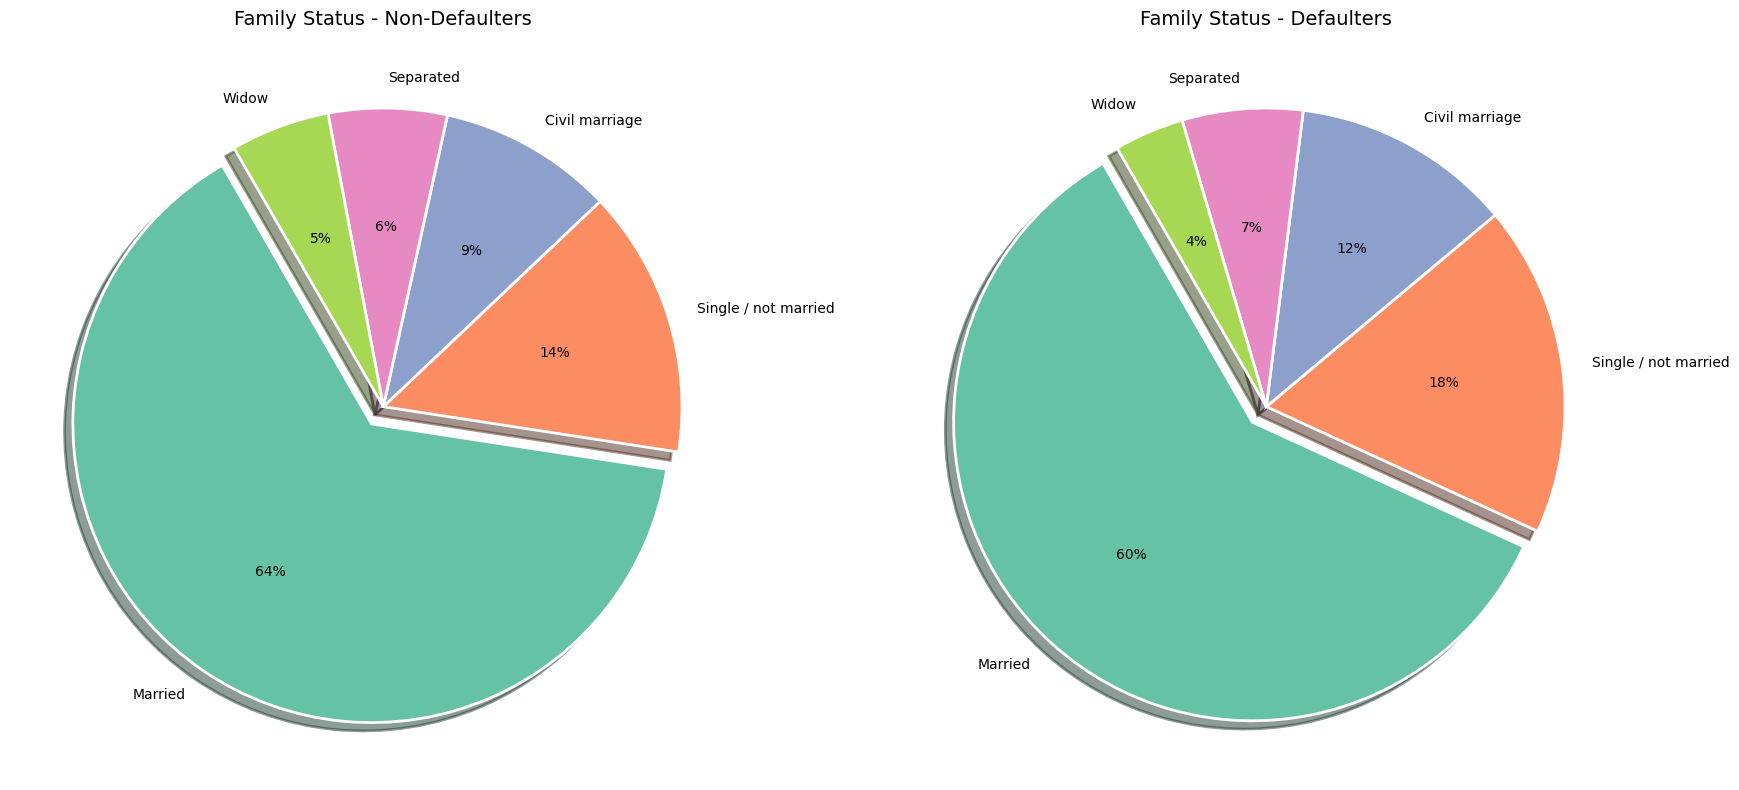

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

for idx, target in enumerate([0, 1]):
    counts = app_df[app_df["TARGET"] == target]["NAME_FAMILY_STATUS"].value_counts()

    explode = [0.07 if i == 0 else 0 for i in range(len(counts))]

    counts.plot.pie(
        autopct="%1.0f%%",
        startangle=120,
        colors=sns.color_palette("Set2", len(counts)),
        wedgeprops={"linewidth": 2, "edgecolor": "white"},
        shadow=True,
        explode=explode,
        ax=axes[idx]
    )

    axes[idx].set_ylabel('')
    axes[idx].set_title(
        f"Family Status - {'Non-Defaulters' if target==0 else 'Defaulters'}",
        fontsize=14
    )

fig.tight_layout()
plt.show()


## Merged DataFrames

In [ ]:
merged = pd.merge(app_df, prev_app_df, on='SK_ID_CURR', how='inner')

In [ ]:
merged.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START_x,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,HOUR_APPR_PROCESS_START_y,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,Laborers,1.0,2,WEDNESDAY,10,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,-1134.0,1,0.0,0.0,0.0,1.0,Consumer loans,9251.775,179055.0,179055.0,179055.0,9,1,XAP,Approved,606,XNA,XAP,New,Vehicles,POS,XNA,Auto technology,24.0,low_normal,POS other with interest
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,Core staff,2.0,1,MONDAY,11,0,0,0,School,0.622246,0.535276,0.0,-828.0,1,0.0,0.0,0.0,0.0,Cash loans,98356.995,900000.0,1035882.0,900000.0,12,1,XNA,Approved,746,XNA,XAP,Repeater,XNA,Cash,x-sell,XNA,12.0,low_normal,Cash X-Sell: low
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,Core staff,2.0,1,MONDAY,11,0,0,0,School,0.622246,0.535276,0.0,-828.0,1,0.0,0.0,0.0,0.0,Consumer loans,64567.665,337500.0,348637.5,337500.0,17,1,XAP,Approved,828,Cash through the bank,XAP,Refreshed,Furniture,POS,XNA,Furniture,6.0,middle,POS industry with interest
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,Core staff,2.0,1,MONDAY,11,0,0,0,School,0.622246,0.535276,0.0,-828.0,1,0.0,0.0,0.0,0.0,Consumer loans,6737.310,68809.5,68053.5,68809.5,15,1,XAP,Approved,2341,Cash through the bank,XAP,Refreshed,Consumer Electronics,POS,XNA,Consumer electronics,12.0,middle,POS household with interest
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,Laborers,1.0,2,MONDAY,9,0,0,0,Government,0.555912,0.729567,0.0,-815.0,0,0.0,0.0,0.0,0.0,Consumer loans,5357.250,24282.0,20106.0,24282.0,5,1,XAP,Approved,815,Cash through the bank,XAP,New,Mobile,POS,XNA,Connectivity,4.0,middle,POS mobile without interest


In [ ]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1363598 entries, 0 to 1363597
Data columns (total 59 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_CURR                   1363598 non-null  int64  
 1   TARGET                       1363598 non-null  int64  
 2   NAME_CONTRACT_TYPE_x         1363598 non-null  object 
 3   CODE_GENDER                  1363598 non-null  object 
 4   FLAG_OWN_CAR                 1363598 non-null  object 
 5   FLAG_OWN_REALTY              1363598 non-null  object 
 6   CNT_CHILDREN                 1363598 non-null  int64  
 7   AMT_INCOME_TOTAL             1363598 non-null  float64
 8   AMT_CREDIT_x                 1363598 non-null  float64
 9   AMT_ANNUITY_x                1363598 non-null  float64
 10  AMT_GOODS_PRICE_x            1363598 non-null  float64
 11  NAME_TYPE_SUITE              1363598 non-null  object 
 12  NAME_INCOME_TYPE             1363598 non-n

In [ ]:
check_per_nulls(merged)

                         Column  Number of Nulls  Length of DF  Null Percentage
0   SK_ID_CURR                   0                1363598       0.0            
1   TARGET                       0                1363598       0.0            
2   NAME_CONTRACT_TYPE_x         0                1363598       0.0            
3   CODE_GENDER                  0                1363598       0.0            
4   FLAG_OWN_CAR                 0                1363598       0.0            
5   FLAG_OWN_REALTY              0                1363598       0.0            
6   CNT_CHILDREN                 0                1363598       0.0            
7   AMT_INCOME_TOTAL             0                1363598       0.0            
8   AMT_CREDIT_x                 0                1363598       0.0            
9   AMT_ANNUITY_x                0                1363598       0.0            
10  AMT_GOODS_PRICE_x            0                1363598       0.0            
11  NAME_TYPE_SUITE              0      

In [ ]:
merged.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START_x,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,HOUR_APPR_PROCESS_START_y,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,Laborers,1.0,2,WEDNESDAY,10,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,-1134.0,1,0.0,0.0,0.0,1.0,Consumer loans,9251.775,179055.0,179055.0,179055.0,9,1,XAP,Approved,606,XNA,XAP,New,Vehicles,POS,XNA,Auto technology,24.0,low_normal,POS other with interest
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,Core staff,2.0,1,MONDAY,11,0,0,0,School,0.622246,0.535276,0.0,-828.0,1,0.0,0.0,0.0,0.0,Cash loans,98356.995,900000.0,1035882.0,900000.0,12,1,XNA,Approved,746,XNA,XAP,Repeater,XNA,Cash,x-sell,XNA,12.0,low_normal,Cash X-Sell: low
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,Core staff,2.0,1,MONDAY,11,0,0,0,School,0.622246,0.535276,0.0,-828.0,1,0.0,0.0,0.0,0.0,Consumer loans,64567.665,337500.0,348637.5,337500.0,17,1,XAP,Approved,828,Cash through the bank,XAP,Refreshed,Furniture,POS,XNA,Furniture,6.0,middle,POS industry with interest
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,Core staff,2.0,1,MONDAY,11,0,0,0,School,0.622246,0.535276,0.0,-828.0,1,0.0,0.0,0.0,0.0,Consumer loans,6737.310,68809.5,68053.5,68809.5,15,1,XAP,Approved,2341,Cash through the bank,XAP,Refreshed,Consumer Electronics,POS,XNA,Consumer electronics,12.0,middle,POS household with interest
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,Laborers,1.0,2,MONDAY,9,0,0,0,Government,0.555912,0.729567,0.0,-815.0,0,0.0,0.0,0.0,0.0,Consumer loans,5357.250,24282.0,20106.0,24282.0,5,1,XAP,Approved,815,Cash through the bank,XAP,New,Mobile,POS,XNA,Connectivity,4.0,middle,POS mobile without interest


In [ ]:
merged[merged['SK_ID_CURR'] == "100002"]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START_x,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,HOUR_APPR_PROCESS_START_y,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION


In [ ]:
merged.groupby('SK_ID_CURR').nunique()['AMT_ANNUITY_x'].head()

,AMT_ANNUITY_x
SK_ID_CURR,
100002,1
100003,1
100004,1
100006,1
100007,1


In [ ]:
# Handle Common Columns

common_columns

['NAME_CONTRACT_TYPE',
 'AMT_GOODS_PRICE',
 'HOUR_APPR_PROCESS_START',
 'AMT_CREDIT',
 'AMT_ANNUITY']

In [ ]:
merged[['SK_ID_CURR' , 'AMT_ANNUITY_x', 'AMT_ANNUITY_y']]

,SK_ID_CURR,AMT_ANNUITY_x,AMT_ANNUITY_y
0,100002,24700.5,9251.775
1,100003,35698.5,98356.995
2,100003,35698.5,64567.665
3,100003,35698.5,6737.310
4,100004,6750.0,5357.250
...,...,...,...
1363593,456255,49117.5,16400.610
1363594,456255,49117.5,2250.000
1363595,456255,49117.5,30737.655
1363596,456255,49117.5,54022.140


In [ ]:
merged['AMT_ANNUITY_MEAN'] = merged[['AMT_ANNUITY_x', 'AMT_ANNUITY_y']].mean(axis=1)

merged.drop(['AMT_ANNUITY_x', 'AMT_ANNUITY_y'], axis=1, inplace=True)

In [ ]:
merged[['SK_ID_CURR' , 'AMT_ANNUITY_MEAN']]

,SK_ID_CURR,AMT_ANNUITY_MEAN
0,100002,16976.1375
1,100003,67027.7475
2,100003,50133.0825
3,100003,21217.9050
4,100004,6053.6250
...,...,...
1363593,456255,32759.0550
1363594,456255,25683.7500
1363595,456255,39927.5775
1363596,456255,51569.8200


In [ ]:
merged[['SK_ID_CURR' , 'HOUR_APPR_PROCESS_START_x', 'HOUR_APPR_PROCESS_START_y']]

,SK_ID_CURR,HOUR_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_y
0,100002,10,9
1,100003,11,12
2,100003,11,17
3,100003,11,15
4,100004,9,5
...,...,...,...
1363593,456255,20,12
1363594,456255,20,14
1363595,456255,20,14
1363596,456255,20,14


In [ ]:
merged['HOUR_APPR_PROCESS_START'] = merged[['HOUR_APPR_PROCESS_START_x', 'HOUR_APPR_PROCESS_START_y']].mean(axis=1).round().astype(int)

merged.drop(['HOUR_APPR_PROCESS_START_x', 'HOUR_APPR_PROCESS_START_y'], axis=1, inplace=True)

In [ ]:
merged[['SK_ID_CURR' , 'AMT_GOODS_PRICE_x', 'AMT_GOODS_PRICE_y']]

,SK_ID_CURR,AMT_GOODS_PRICE_x,AMT_GOODS_PRICE_y
0,100002,351000.0,179055.0
1,100003,1129500.0,900000.0
2,100003,1129500.0,337500.0
3,100003,1129500.0,68809.5
4,100004,135000.0,24282.0
...,...,...,...
1363593,456255,675000.0,229500.0
1363594,456255,675000.0,45000.0
1363595,456255,675000.0,765000.0
1363596,456255,675000.0,1170000.0


In [ ]:
merged['AMT_GOODS_PRICE'] = merged[['AMT_GOODS_PRICE_x', 'AMT_GOODS_PRICE_y']].mean(axis=1)

merged.drop(['AMT_GOODS_PRICE_x', 'AMT_GOODS_PRICE_y'], axis=1, inplace=True)

In [ ]:
merged[['SK_ID_CURR' , 'AMT_CREDIT_x' , 'AMT_CREDIT_y']]

,SK_ID_CURR,AMT_CREDIT_x,AMT_CREDIT_y
0,100002,406597.5,179055.0
1,100003,1293502.5,1035882.0
2,100003,1293502.5,348637.5
3,100003,1293502.5,68053.5
4,100004,135000.0,20106.0
...,...,...,...
1363593,456255,675000.0,254340.0
1363594,456255,675000.0,45000.0
1363595,456255,675000.0,1067940.0
1363596,456255,675000.0,1271929.5


In [ ]:
merged['AMT_CREDIT'] = merged[['AMT_CREDIT_x', 'AMT_CREDIT_y']].mean(axis=1)

merged.drop(['AMT_CREDIT_x', 'AMT_CREDIT_y'], axis=1, inplace=True)

In [ ]:
merged[['SK_ID_CURR' , 'NAME_CONTRACT_TYPE_x' , 'NAME_CONTRACT_TYPE_y']]

,SK_ID_CURR,NAME_CONTRACT_TYPE_x,NAME_CONTRACT_TYPE_y
0,100002,Cash loans,Consumer loans
1,100003,Cash loans,Cash loans
2,100003,Cash loans,Consumer loans
3,100003,Cash loans,Consumer loans
4,100004,Revolving loans,Consumer loans
...,...,...,...
1363593,456255,Cash loans,Cash loans
1363594,456255,Cash loans,Revolving loans
1363595,456255,Cash loans,Cash loans
1363596,456255,Cash loans,Cash loans


In [ ]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1363598 entries, 0 to 1363597
Data columns (total 55 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_CURR                   1363598 non-null  int64  
 1   TARGET                       1363598 non-null  int64  
 2   NAME_CONTRACT_TYPE_x         1363598 non-null  object 
 3   CODE_GENDER                  1363598 non-null  object 
 4   FLAG_OWN_CAR                 1363598 non-null  object 
 5   FLAG_OWN_REALTY              1363598 non-null  object 
 6   CNT_CHILDREN                 1363598 non-null  int64  
 7   AMT_INCOME_TOTAL             1363598 non-null  float64
 8   NAME_TYPE_SUITE              1363598 non-null  object 
 9   NAME_INCOME_TYPE             1363598 non-null  object 
 10  NAME_EDUCATION_TYPE          1363598 non-null  object 
 11  NAME_FAMILY_STATUS           1363598 non-null  object 
 12  NAME_HOUSING_TYPE            1363598 non-n

In [ ]:
merged['TARGET'].value_counts()

,count
TARGET,
0,1246249
1,117349


In [ ]:
merged.to_csv('/content/drive/MyDrive/Work/Banque Misr/Loan Defaulter Archive/Merged.csv', index=False)